# Loading of the dataset onto Dataframe.

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv(r"C:\Users\HP\Downloads\global-terrorism-database\globalterrorismdb.csv",encoding = "ISO-8859-1")
pd.options.display.max_columns=140
df.head()

C:\Users\HP\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,

In [2]:
df.shape

(170350, 135)

# Univariate Analysis 
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. A variable in univariate analysis is just a condition or subset that your data falls into. Basically a feature or column value.

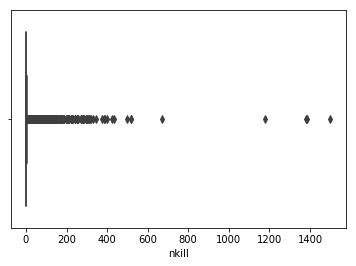

In [3]:
#analysis of numerical data.
#Analysis of variation of values nkill(Number of kills) feature
sns.boxplot(x=df['nkill'])

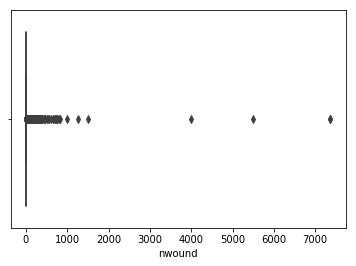

In [4]:
#Analysis of variation of values nwounds(Number of wounds) feature
sns.boxplot(x=df['nwound'])

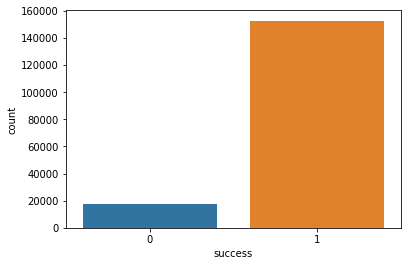

In [5]:
#Analysis of variation of Categorical data.
#Number of successful Terrorist Attack:(1=Successful,2=Failure)
sns.countplot(x='success',data=df)

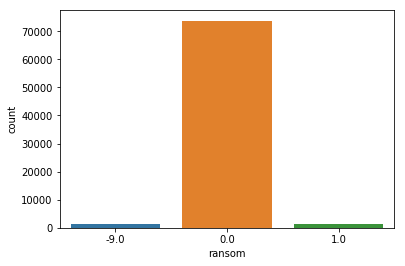

In [6]:
#Number of attacks with ransom:(1=Yes,0=No.-9=Not known)
sns.countplot(x='ransom',data=df)

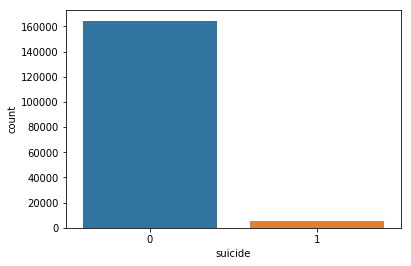

In [7]:
#Number of suicide attacks(1=Yes,0=No):
sns.countplot(x='suicide',data=df)

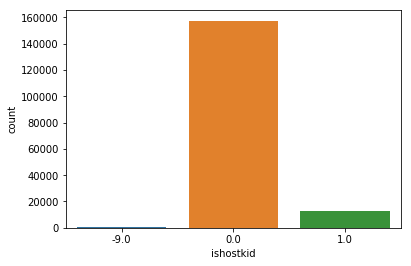

In [8]:
#Number of attacks in which there was a hostkid(1=Yes,0=No):
sns.countplot(x='ishostkid',data=df)

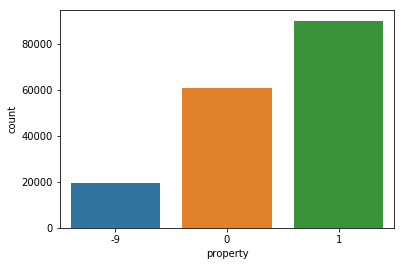

In [9]:
#Number of attacks that caused damage to property(1=Yes,0=No):
sns.countplot(x='property',data=df)

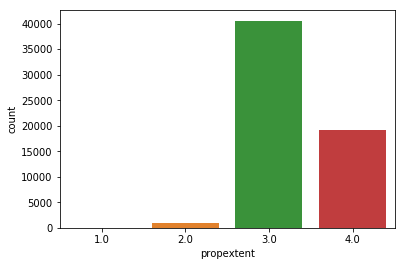

In [10]:
#Number of property damage attacks(1=No values,2=Major (likely >1𝑚𝑖𝑙𝑙𝑖𝑜𝑛 𝑏𝑢𝑡 <1 billion),3=Minor (likely < $1 million),4=Unknown):
sns.countplot(x='propextent',data=df)

# Missing value Treatment.
This step includes handling of data with missing or NaN values.

In [11]:
#Removing Columns(features) with 80% missing values.
df3=df.isnull().sum()#Summing up null values
df3
df3=df3/len(df)#Finding the percentage of null values.
df3
thresh = len(df) * .25

#Removing those columns(features) with more than 75% of null values.
df.dropna(thresh = thresh, axis = 1, inplace = True) 


#Removing all rows with -99 being an observation of numerical data.
#df = df[~(df == -99).any(axis=1)]

In [12]:
df.shape

(170350, 65)

In [13]:
#Treating missing values of numerical features by replacing missing values by mean.
#Replacing the null values by mean:
kills=df["nkill"]
mkills=np.mean(kills)
df["nkill"].fillna(mkills,inplace=True)

killus=df["nkillus"]
mkillus=np.mean(killus)
df["nkillus"].fillna(mkillus,inplace=True)


killter=df["nkillter"]
mkillter=np.mean(killter)
df["nkillter"].fillna(mkillter,inplace=True)

perp=df["nperps"]
mperp=np.mean(perp)
df["nperps"].fillna(mperp,inplace=True)

wound=df["nwound"]
mwound=np.mean(wound)
df["nwound"].fillna(mwound,inplace=True)

woundus=df["nwoundus"]
mwoundus=np.mean(woundus)
df["nwoundus"].fillna(mwoundus,inplace=True)

#Missing value tretment for features like nperps,npercap will be done when only after removal of outliers.

#perps=df["nperps"]
#mperps=np.mean(perps)
#df["nperps"].fillna(mperps,inplace=True)

#caps=df["nperpcap"]
#mcaps=np.mean(caps)
#df["npercap"].fillna(mcaps,inplace=True)

#Converting float values to integer:

df.nkill = df.nkill.astype(int)
df.nkillus = df.nkillus.astype(int)
df.nkillter = df.nkillter.astype(int)

df.nperps = df.nperps.astype(int)
df.nwound = df.nwound.astype(int)
df.nwoundus = df.nwoundus.astype(int)


In [14]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,NaN,0.0,0,-63,NaN,NaN,13,Unknown,NaN,NaN,NaN,1,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,NaN,0.0,0,7,NaN,NaN,13,Unknown,NaN,NaN,NaN,0,0,0,0,0,NaN,0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,NaN,0.0,0,-63,NaN,NaN,13,Unknown,NaN,NaN,NaN,1,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,NaN,0.0,0,-63,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,Explosive,2,0,0,3,0,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,NaN,0.0,0,-63,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,2,0,0,3,0,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0,0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,0.0,0,-99,-99.0,0.0,5,Firearms,5.0,Unknown Gun Type,Several gunshots were fired.,0,0,0,0,0,0.0,1,3.0,Minor (likely < $1 million),NaN,0.0,0.0,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...",Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0,0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),NaN,0.0,0,3,NaN,NaN,5,Firearms,2.0,Automatic Weapon,Automatic firearm,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.805065,-122.273024,1.0,0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1,0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,NaN,0.0,0,-99,-99.0,0.0,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,0,0,0,0,0,0.0,1,3.0,Minor (likely < $1

In [15]:
#Treating missing values of categorical features by considering them as another category.
df["location"].fillna("No Info", inplace = True)
df["summary"].fillna("No Info", inplace = True)
df["scite1"].fillna("No Info", inplace = True)
df["scite2"].fillna("No Info", inplace = True)
df["corp1"].fillna("No Info", inplace = True)
df["target1"].fillna("No Info", inplace = True)
df["motive"].fillna("No Info", inplace = True)
df["propcomment"].fillna("No Info", inplace = True)


In [16]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propcomment,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,No Info,No Info,1,1,1,0,0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,No Info,Julio Guzman,58.0,Dominican Republic,MANO-D,No Info,0.0,0,-63,NaN,NaN,13,Unknown,NaN,NaN,NaN,1,0,0,0,0,NaN,0,NaN,NaN,No Info,0.0,0.0,No Info,No Info,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,No Info,No Info,1,1,1,0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,No Info,0.0,0,7,NaN,NaN,13,Unknown,NaN,NaN,NaN,0,0,0,0,0,NaN,0,NaN,NaN,No Info,1.0,1.0,No Info,No Info,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,No Info,No Info,1,1,1,0,0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,No Info,0.0,0,-63,NaN,NaN,13,Unknown,NaN,NaN,NaN,1,0,0,0,0,NaN,0,NaN,NaN,No Info,0.0,0.0,No Info,No Info,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,No Info,No Info,1,1,1,0,0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,No Info,U.S. Embassy,217.0,United States,Unknown,No Info,0.0,0,-63,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,Explosive,2,0,0,3,0,NaN,1,NaN,NaN,No Info,0.0,0.0,No Info,No Info,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,NaN,Fukouka,33.580412,130.396361,1.0,0,No Info,No Info,1,1,1,-9,0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,No Info,U.S. Consulate,217.0,United States,Unknown,No Info,0.0,0,-63,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,2,0,0,3,0,NaN,1,NaN,NaN,No Info,0.0,0.0,No Info,No Info,PGIS,-9,-9,1,1


# Outlier Treatment
Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. So in this step we basically try and remove the outliers as far as possible.


In [17]:
#median (Q2/50th Percentile): the middle value of the dataset.
#first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
#third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
#interquartile range (IQR): 25th to the 75th percentile.
#“maximum”: Q3 + 1.5*IQR
#“minimum”: Q1 -1.5*IQR

#Removing outliers from nkill feature.
q1 = df["nkill"].quantile(0.25)
q3 = df["nkill"].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df = df.loc[(df["nkill"] > fence_low) & (df["nkill"] < fence_high)]

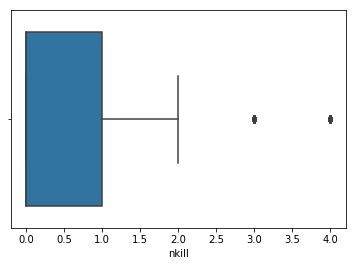

In [18]:
sns.boxplot(x=df['nkill'])

In [19]:
#Removing outliers from nwound feature.

q1 = df["nwound"].quantile(0.25)
q3 = df["nwound"].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df= df.loc[(df["nwound"] > fence_low) & (df["nwound"] < fence_high)]

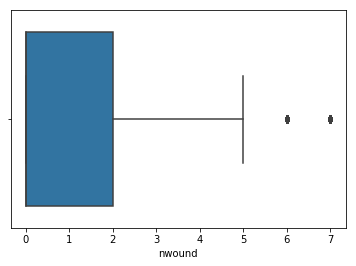

In [20]:
sns.boxplot(x=df['nwound'])

#Removing rows with data value-9(outlier).
#df=df[df.ransom!=-9]
#df=df[df.ishostkid!=-9]
#df=df[df.property!=-9]
#Removing rows with data value-99(outlier).
#df=df[df.nperps!=-99]
#df=df[df.nperpcap!=-99] We have not removed outliers here as they might significantly change the analysis. Outlier treatment will be utilised when necessary.

# Variable transformation

Skewness, in statistics, is the degree of distortion from the symmetrical bell curve, or normal distribution, in a set of data. Skewness can be negative, positive, zero or undefined. A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew.


In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

No variable transformation is required as features of transformed categorical data are already present. 

In [21]:
#To calculate skewness of the various numerical data.
df["nkill"].skew(axis = 0, skipna = True)


1.3286365175679369

In [22]:
df["nwound"].skew(axis = 0, skipna = True)


1.646747138483034

In [23]:
df1=df[df.nperps!=-99]
perps=df1["nperps"]
mperps=np.mean(perps)
df1["nperps"].fillna(mperps,inplace=True)

C:\Users\HP\Anaconda3\Lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
df1["nperps"].skew(axis = 0, skipna = True)

43.869451631306376

C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


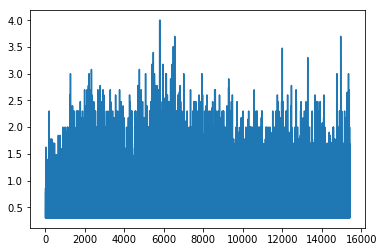

In [25]:
#Variable transformation is required to reduce skewness.
df1['nperps_log'] = np.log10(df1['nperps'])
a=df1[df1["nperps_log"]>0]
b=a["nperps_log"].values
plt.plot(b)

In [26]:
(df1["nperps_log"]>0).skew(axis = 0, skipna = True)

1.5857530624610177

C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


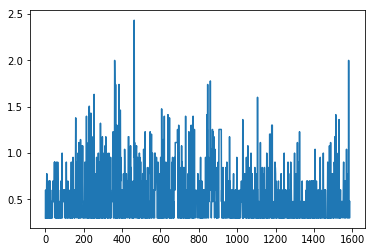

In [27]:
df2=df[df.nperpcap!=-99]
caps=df2["nperpcap"]
mcaps=np.mean(caps)
df2["nperpcap"].fillna(mcaps,inplace=True)

df2["nperpcap"].skew(axis = 0, skipna = True)

df2["nperpcap"].skew(axis = 0, skipna = True)
df2['nperpcap_log'] = np.log10(df2['nperpcap'])
a=df2[df2["nperpcap_log"]>0]
b=a["nperpcap_log"].values
plt.plot(b)

# Analysis of dataset based on different parameters.

## Most active Terror groups (based on number of Kills)
We are doing an analysis on the most active terrorist groups worldwide on the basis of the number of people killed by them. Here we extract the data of terrorist groups and the number of people killed by them from the dataset. We finally plot the data using seaborn module of top 38 terrorist groups.

In [28]:
df2 = df[~(df['nkill'] < 0)]
group_kills = df2.groupby(['gname', 'nkill']).size().to_frame().reset_index()
group_kills['nkill'] = group_kills['nkill'] * group_kills[0]
group_kills = group_kills[(~(group_kills['nkill'] == 0)) & (group_kills['gname'] != 'Unknown')]
#group_kills = group_kills.sort_values(by = 'nkill', ascending=False).reset_index()
group_kills.drop(columns=0,inplace=True)
group_kills = group_kills.set_index('gname').sum(level='gname').sort_values(by = 'nkill', ascending=False).reset_index()
group_kills_100 = group_kills[group_kills['nkill'] > 250]

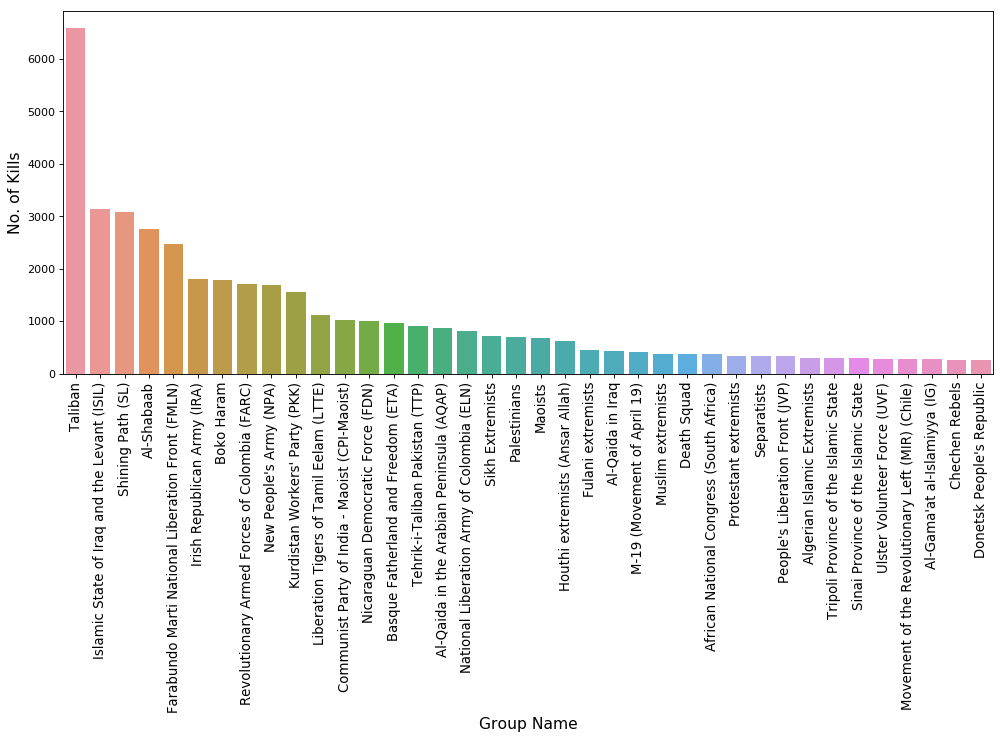

In [29]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x = 'gname', y='nkill', data=group_kills_100)
plt.xlabel("Group Name", fontsize = 14)
plt.ylabel('No. of Kills', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

## Top-50 countries in the world which have been most prone to terror attacks
There have been more than 170,000 terrorist attacks in past 5 decades. We analyse this information provided in the dataset to find the top-50 countries of the world which have been the unfortunate victim of terrorists.

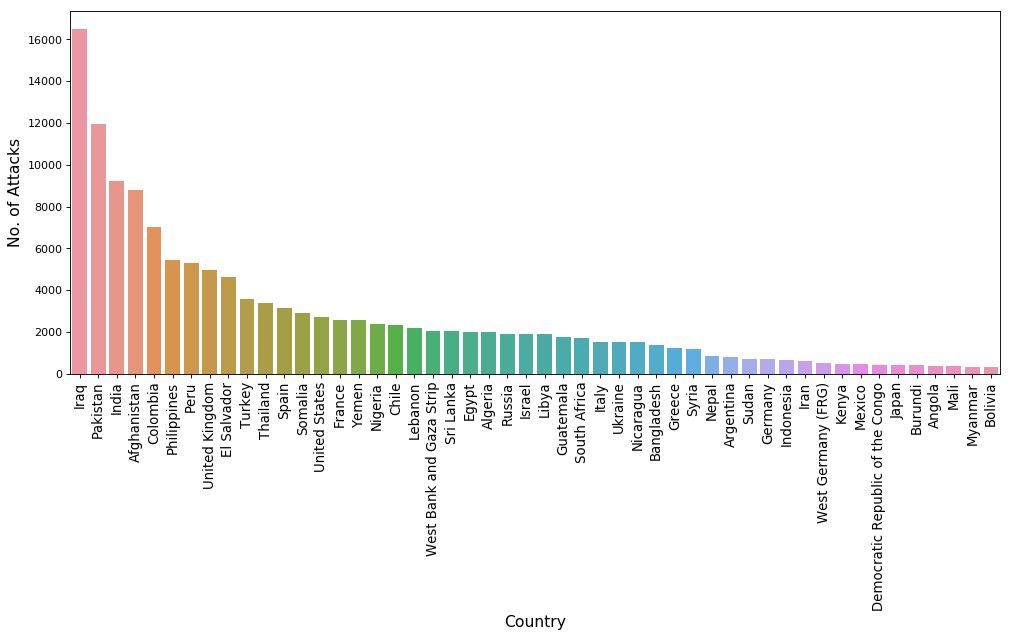

In [30]:
country = df.groupby(['country_txt']).size().to_frame().sort_values(by=0, ascending = False).reset_index()
country_50 = country[:50]

plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x = 'country_txt', y=0, data=country_50)
plt.xlabel("Country", fontsize = 14)
plt.ylabel('No. of Attacks', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

## Top 10 Terrorist Groups worldwide (based on number of victims)
From the given data we know that there have been more than 3500 terrorist groups avtive since 1970-2017. Out of these many groups we find the 10 most deadly terrorist groups based on the number of casulties or victims (number of people killed and wounded).

In [31]:
df2 = df[(df['nkill'] > 0) & (df['nwound'] > 0)]
group_victims = df2.groupby(['gname', 'nkill', 'nwound']).size().to_frame().reset_index()
group_victims['nkill'] = group_victims['nkill'] * group_victims[0]
group_victims['nwound'] = group_victims['nwound'] * group_victims[0]
group_victims['victims'] = (group_victims['nkill'] + group_victims['nwound']).round(0)
group_victims = group_victims.drop(columns=0)
group_victims = group_victims[group_victims['gname'] != 'Unknown']
group_victims = group_victims.sort_values(by='victims', ascending=False).reset_index()
group_victims_10 = group_victims[:10]

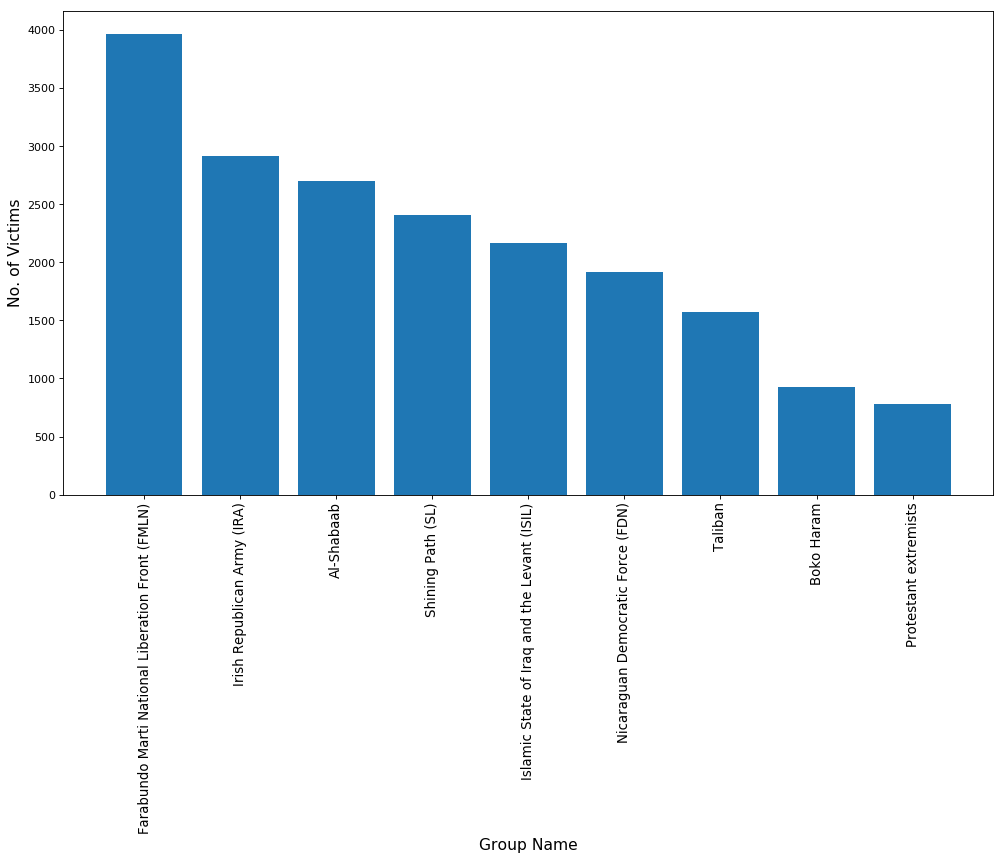

In [32]:
plt.subplots(figsize=(15,8), dpi=80)
plt.bar(group_victims_10['gname'], group_victims_10['victims'])
#sns.barplot(x = 'gname', y = 'victims', data = group_victims_10)
plt.xlabel("Group Name", fontsize = 14)
plt.ylabel('No. of Victims', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

## Most used method of Attack
In all these years, we see a pattern in the method of attack used by the terrorists. They mainly stick to the most common 8 methods of attack. Thus, we analyse that which type of method has been used most by the terrorists.

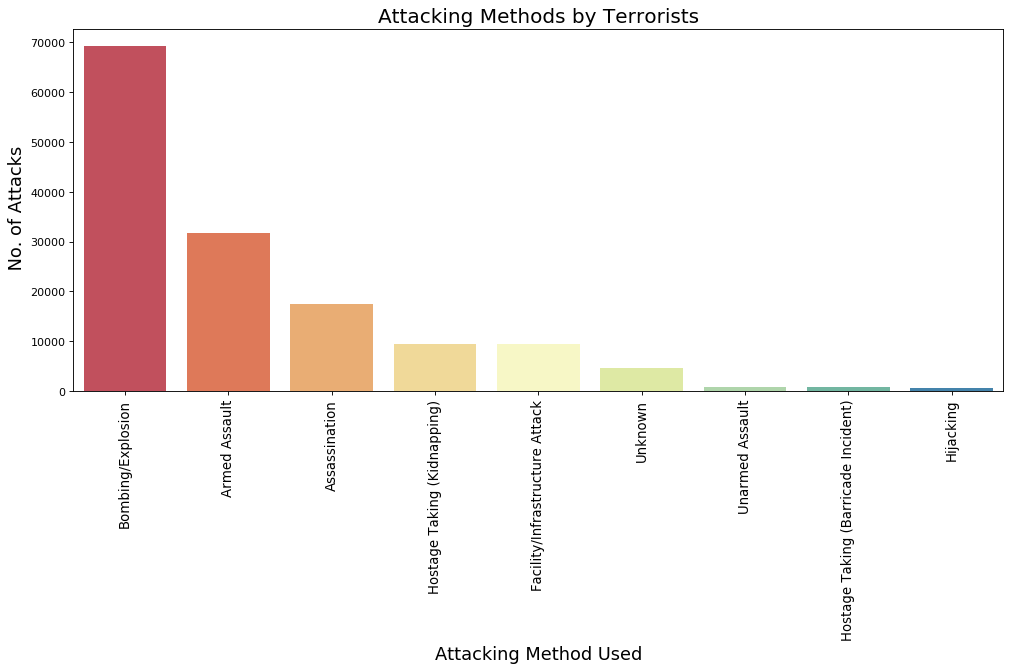

In [33]:
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('attacktype1_txt',data=df, palette='Spectral',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90, fontsize=12)
plt.title('Attacking Methods by Terrorists', fontsize = 18)
plt.xlabel("Attacking Method Used", fontsize = 16)
plt.ylabel(" No. of Attacks", fontsize = 16)
plt.show()

## Most successful type of Attack
From the above plot we inferred the most common methods used to attack by the terrorists. Now, we analyse how many of these attacks were successful. From both the plots drawn, we can see that Bombing is the most common and successful method

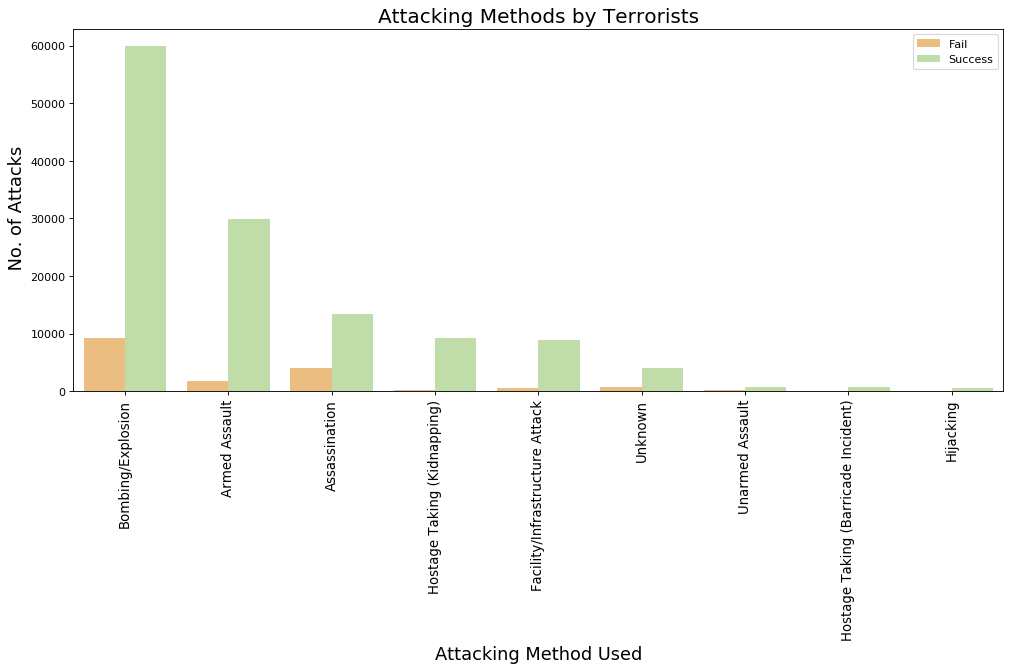

In [34]:
plt.subplots(figsize=(15,6),dpi=80)
sns.countplot('attacktype1_txt',data=df, palette='Spectral',order=df['attacktype1_txt'].value_counts().index, hue='success')
plt.xticks(rotation=90, fontsize=12)
plt.title('Attacking Methods by Terrorists', fontsize = 18)
plt.xlabel("Attacking Method Used", fontsize = 16)
plt.ylabel(" No. of Attacks", fontsize = 16)
plt.legend(labels=['Fail', 'Success'])
plt.show()

## Number of Hostages per region (based on presence of ransom note)
We are analysing the events of kidnapping and hostages in which a ransom note was found (or some ransom was asked). We perform a region-wise analysis of the total number of hostages in such events.

In [35]:
df2 = df[(df['ransom'] >=1) & (df['nperpcap'] >0)]
host_region = df2.groupby(['nperpcap', 'ransom', 'region_txt', 'success']).size().to_frame().reset_index()
host_region['nperpcap'] = host_region['nperpcap'].round(0) * host_region[0]
host_region.drop(columns=0, inplace=True)

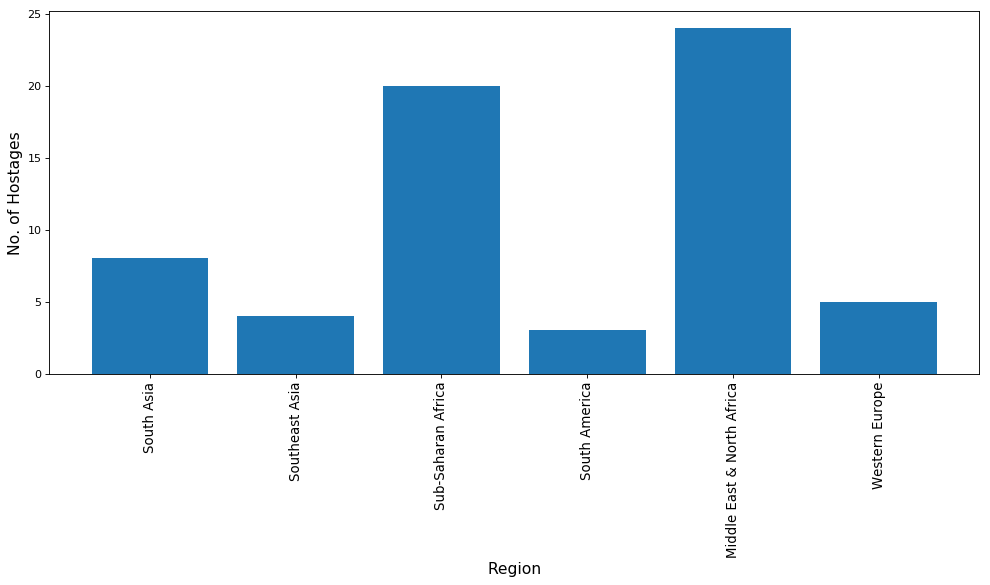

In [36]:
plt.subplots(figsize=(15,6),dpi=80)
plt.bar(host_region['region_txt'], host_region['nperpcap'])
#sns.barplot(x='region_txt', y='nperpcap', data = host_region, hue='ransom')
plt.xlabel("Region", fontsize = 14)
plt.ylabel('No. of Hostages', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
#plt.legend(labels=['False', 'True'])
plt.show()

## Analysis of the years 2006-16 in India:
Here we analyse the data of these specific 10 years as we can see from the plot(given below) that rise at a steep rate during 2007-08 which reachs it's peak in 2016.
Here, we perform the analysis of the most common targets of terrorists, methods of attacks, types of weapon used and the most active terror group based on the number of attacks.

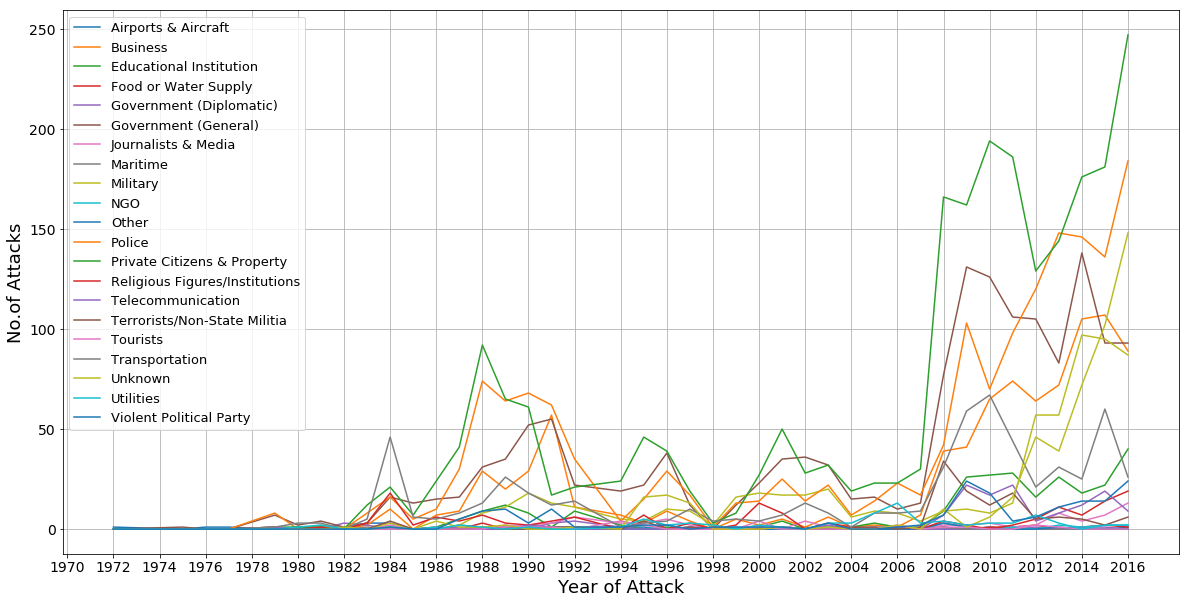

In [37]:
df2 = df[df['country_txt'] == 'India']
year_region=pd.crosstab(df2.iyear,df2.targtype1_txt)
year_region.plot(figsize = (20,10), grid=True)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel('No.of Attacks', fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=13)
plt.show()

In [38]:
terror_06_16 = df[(df['iyear'] >= 2006) & (df['iyear'] <= 2016) & (df['country_txt'] == 'India')]

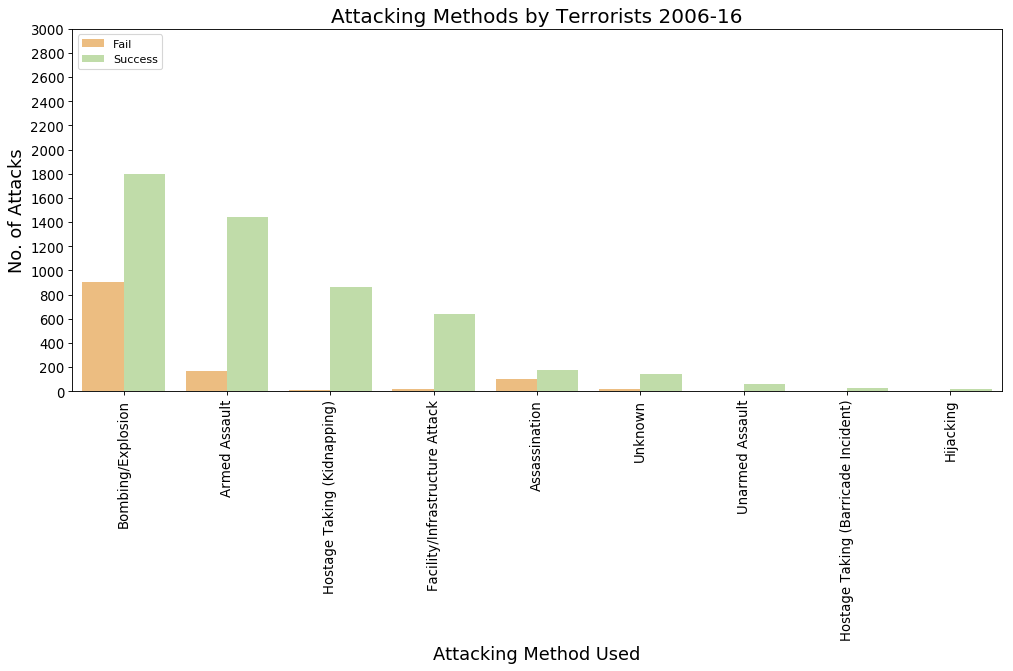

In [39]:
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('attacktype1_txt',data=terror_06_16, palette='Spectral', order=terror_06_16['attacktype1_txt'].value_counts().index, hue='success')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(np.arange(0,3100,200), fontsize=12)
plt.title('Attacking Methods by Terrorists 2006-16', fontsize = 18)
plt.xlabel("Attacking Method Used", fontsize = 16)
plt.ylabel("No. of Attacks", fontsize = 16)
plt.legend(labels=['Fail', 'Success'])
plt.show()

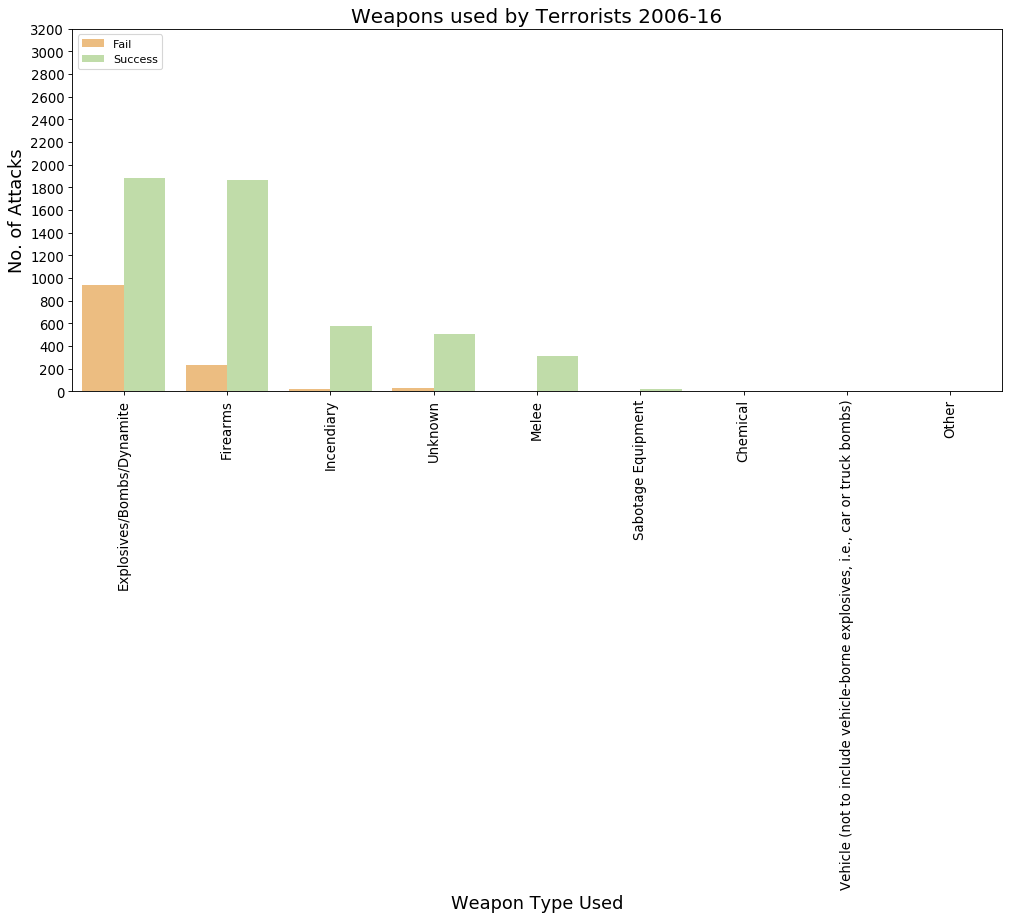

In [40]:
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('weaptype1_txt',data=terror_06_16, palette='Spectral', order=terror_06_16['weaptype1_txt'].value_counts().index, hue='success')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(np.arange(0,3400,200),fontsize=12)
plt.title('Weapons used by Terrorists 2006-16', fontsize = 18)
plt.xlabel("Weapon Type Used", fontsize = 16)
plt.ylabel("No. of Attacks", fontsize = 16)
plt.legend(labels=['Fail', 'Success'])
plt.show()

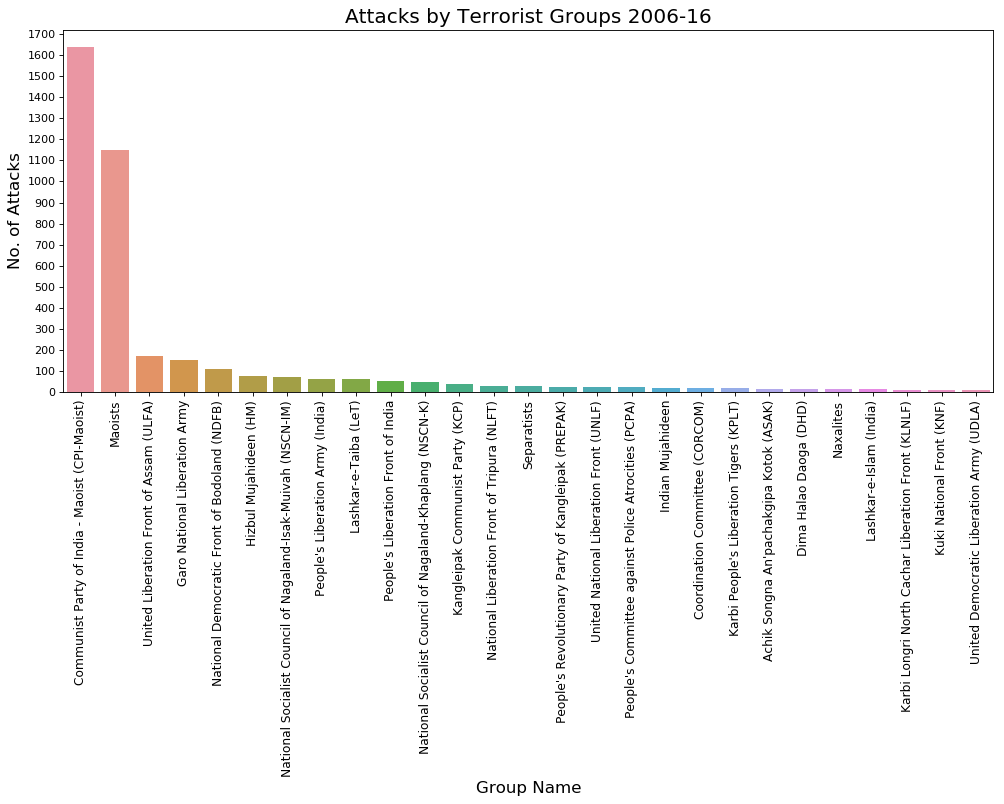

In [41]:
group = terror_06_16['gname'].value_counts().to_frame().reset_index()
group = group[group['gname'] > 10]
group.rename(columns={'gname':'attack_count', 'index':'group_name'}, inplace=True)
group.drop(index=0, inplace=True)

plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x='group_name', y='attack_count', data=group)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(np.arange(0,1800,100))
plt.title('Attacks by Terrorist Groups 2006-16', fontsize = 18)
plt.xlabel("Group Name", fontsize = 15)
plt.ylabel("No. of Attacks", fontsize = 15)
plt.show()

## Most terror prone region of India
India comes 4th in the list of number of terroist attacks in a country. We analyse the data to find which region/states of India are most prone to terrorist attacks.

In [42]:
df2 = df[df['country_txt'] == 'India']
india_region = df2.groupby(['provstate','gname']).size().to_frame().reset_index()
india_region = india_region[(india_region['provstate'] != 'Unknown') & (india_region['gname'] != 'Unknown') & (india_region[0] > 100)].sort_values(by=0,ascending=False).reset_index()
active_terror = india_region.set_index('gname').sum(level='gname').sort_values(by = 0, ascending=False).drop(columns='index').reset_index()

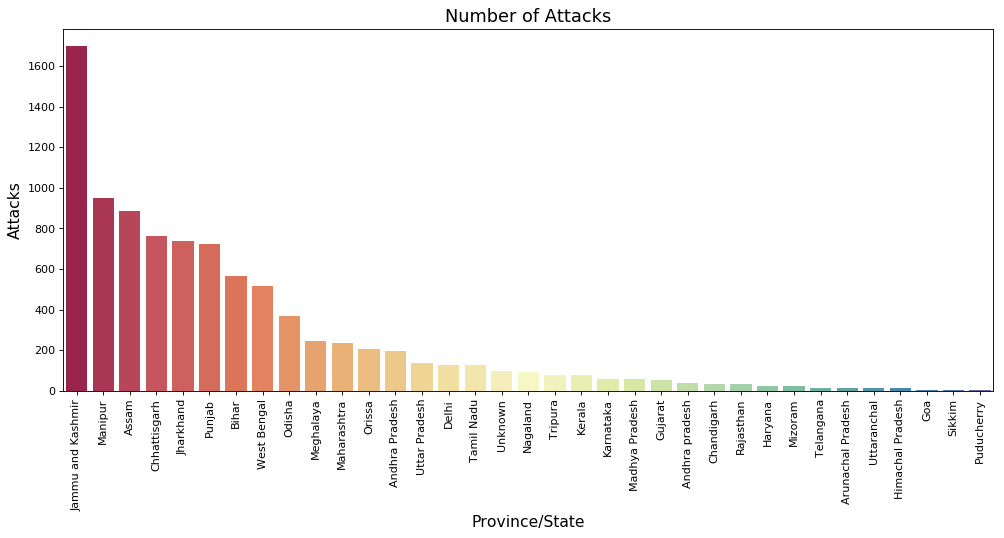

In [43]:
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('provstate',data=df2,palette='Spectral',order=df2['provstate'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks',fontsize=16)
plt.xlabel("Province/State", fontsize=14)
plt.ylabel("Attacks", fontsize=14)
plt.show()

Now, we analyse a little more into the regions attacked to find out the most active terrorist groups in India.

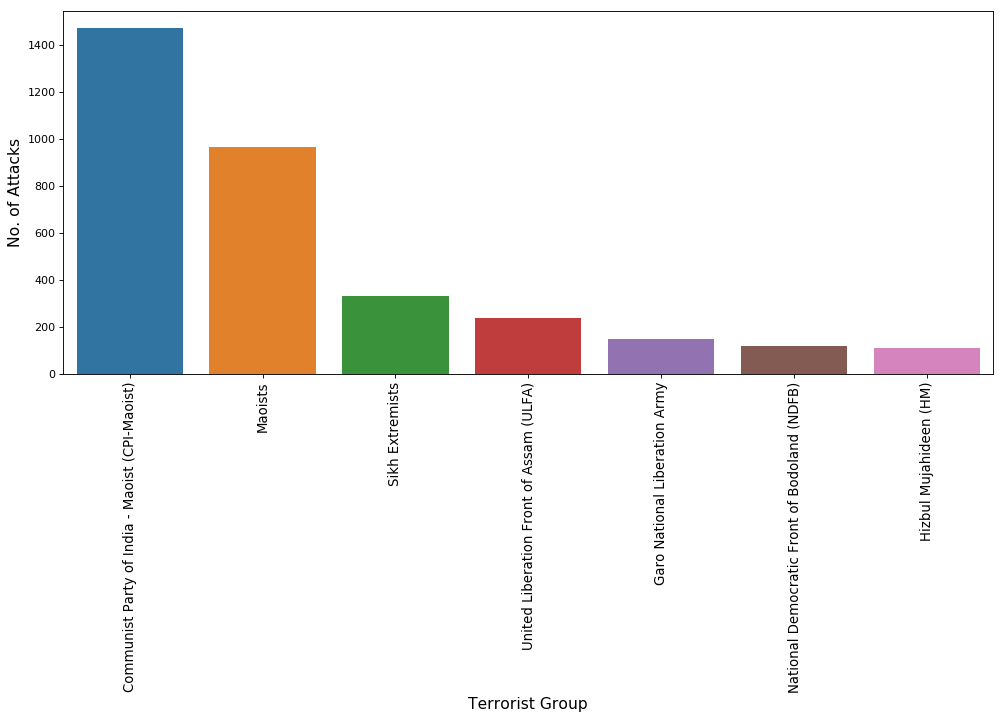

In [44]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x='gname', y=0, data=active_terror)
plt.xlabel("Terrorist Group", fontsize = 14)
plt.ylabel('No. of Attacks', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
plt.show()

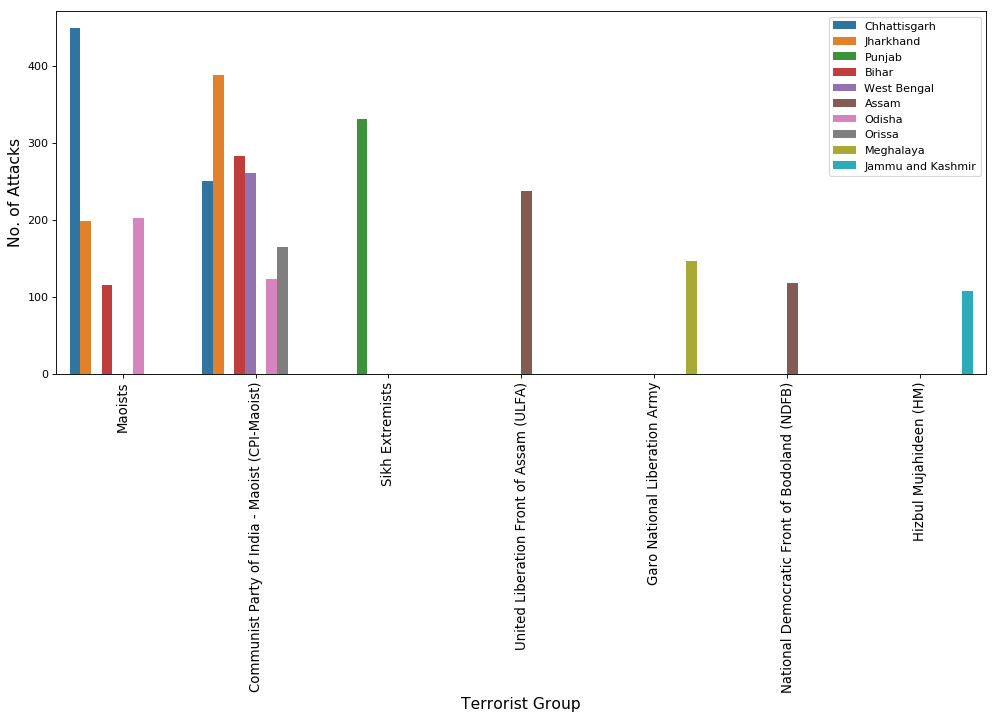

In [45]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x='gname', y=0, data=india_region , hue='provstate')
plt.xlabel("Terrorist Group", fontsize = 14)
plt.ylabel('No. of Attacks', fontsize = 14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(loc = 'upper right')
plt.show()

## Terrorist groups that targeted the economic sector
Economy is the backbone of a country, which makes it the one of the most sought target by the terrorists. There have been many attacks on business and corporate sectors in India - from a small grocery store to Multinational Corporations. We have performed a year-wise analysis of the number of attacks on the business sector by different Terrorist Organizations.

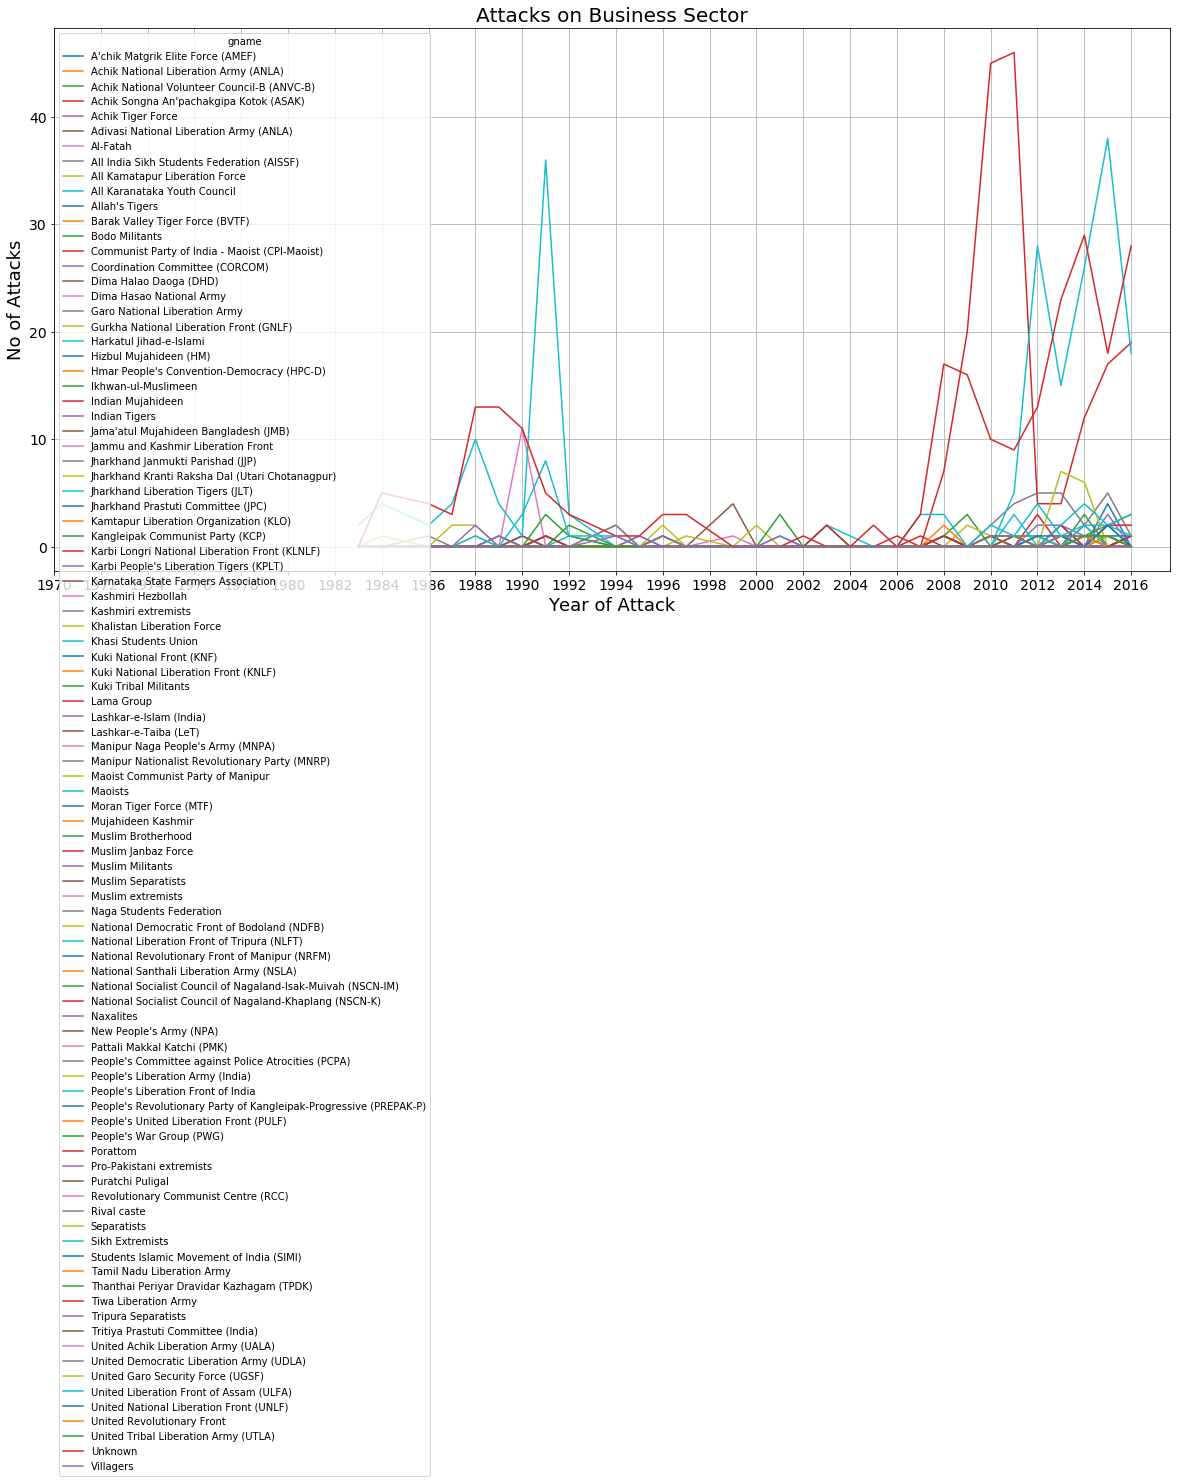

In [46]:
bus = df[(df['country_txt'] == 'India') & (df['targtype1_txt'] == 'Business')]
business_attack = pd.crosstab(bus.iyear, bus.gname)
business_attack.plot(figsize = (20, 10), grid = True)
plt.title("Attacks on Business Sector", fontsize = 20)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel("No of Attacks", fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Terrorist groups with religious propaganda
Today the most popular motive of the terrorist groups is religious propaganda. This type of terrorism has been termed as religious terrorism. In this the terrorists attack the religious institutions/places or religious leaders. We have performed an year-wise analysis of attacks on relious places/institutions in India.

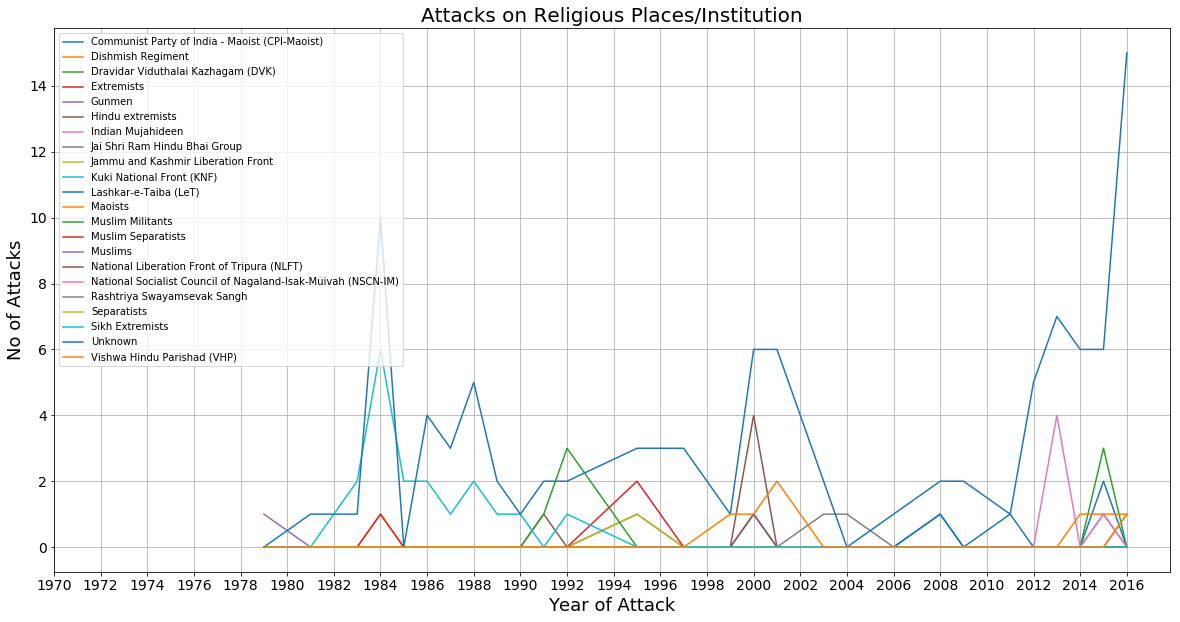

In [47]:
religious = df[(df['country_txt'] == 'India') & (df['targtype1_txt'] == 'Religious Figures/Institutions')]
religious_attack = pd.crosstab(religious.iyear, religious.gname)
religious_attack.plot(figsize = (20, 10), grid = True)
plt.title("Attacks on Religious Places/Institution", fontsize = 20)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel("No of Attacks", fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left')
plt.show()

## Terror attacks on Military forces
Here we have performed a year-wise analysis on the most active terror groups that have attacked the Military forces of India.

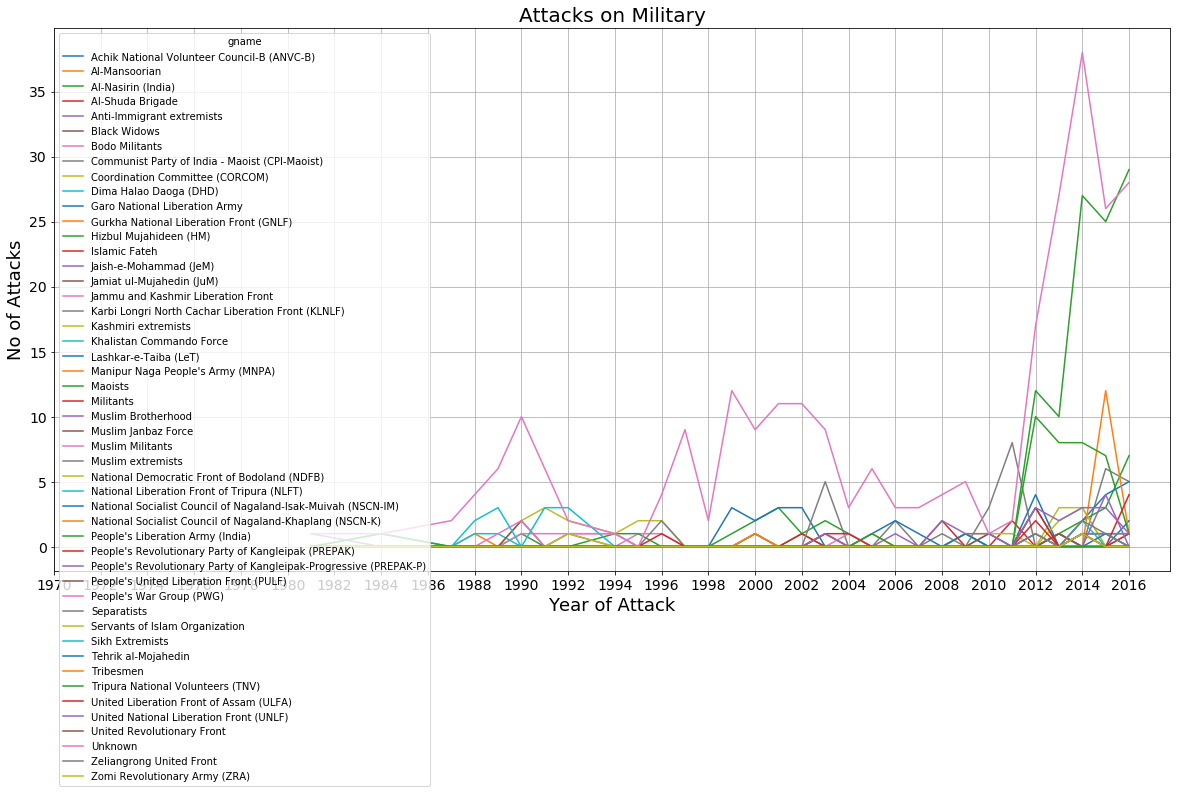

In [48]:
military = df[(df['country_txt'] == 'India') & (df['targtype1_txt'] == 'Military')]
militia_attack = pd.crosstab(military.iyear, military.gname)
militia_attack.plot(figsize = (20, 10), grid = True)
plt.title("Attacks on Military", fontsize = 20)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel("No of Attacks", fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Attacks on the Police Forces (India)
Here we have performed a year-wise analysis on the most active terror groups in India that have attacked the Police.

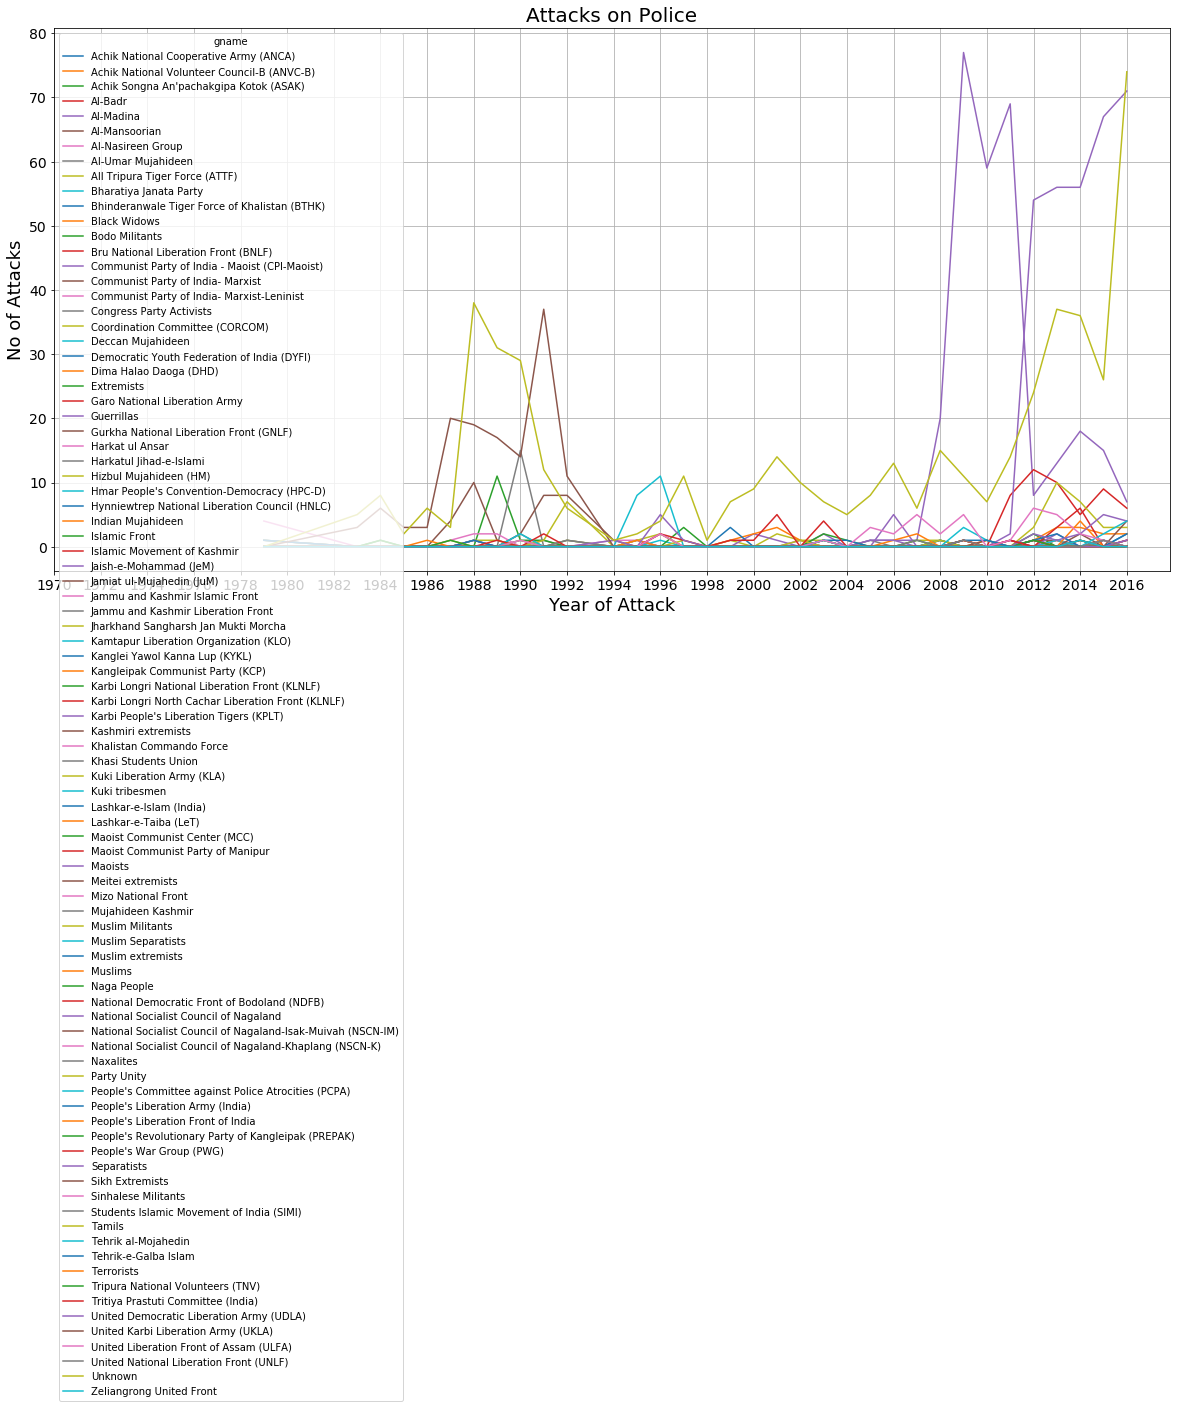

In [49]:
police = df[(df['country_txt'] == 'India') & (df['targtype1_txt'] == 'Police')]
police_attack = pd.crosstab(police.iyear, police.gname)
police_attack.plot(figsize = (20, 10), grid = True)
plt.title("Attacks on Police", fontsize = 20)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel("No of Attacks", fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Attacks on Government of India (diplomatic & General)
An analysis has been done on the attacks on the Government of India- both Diplomatic and General

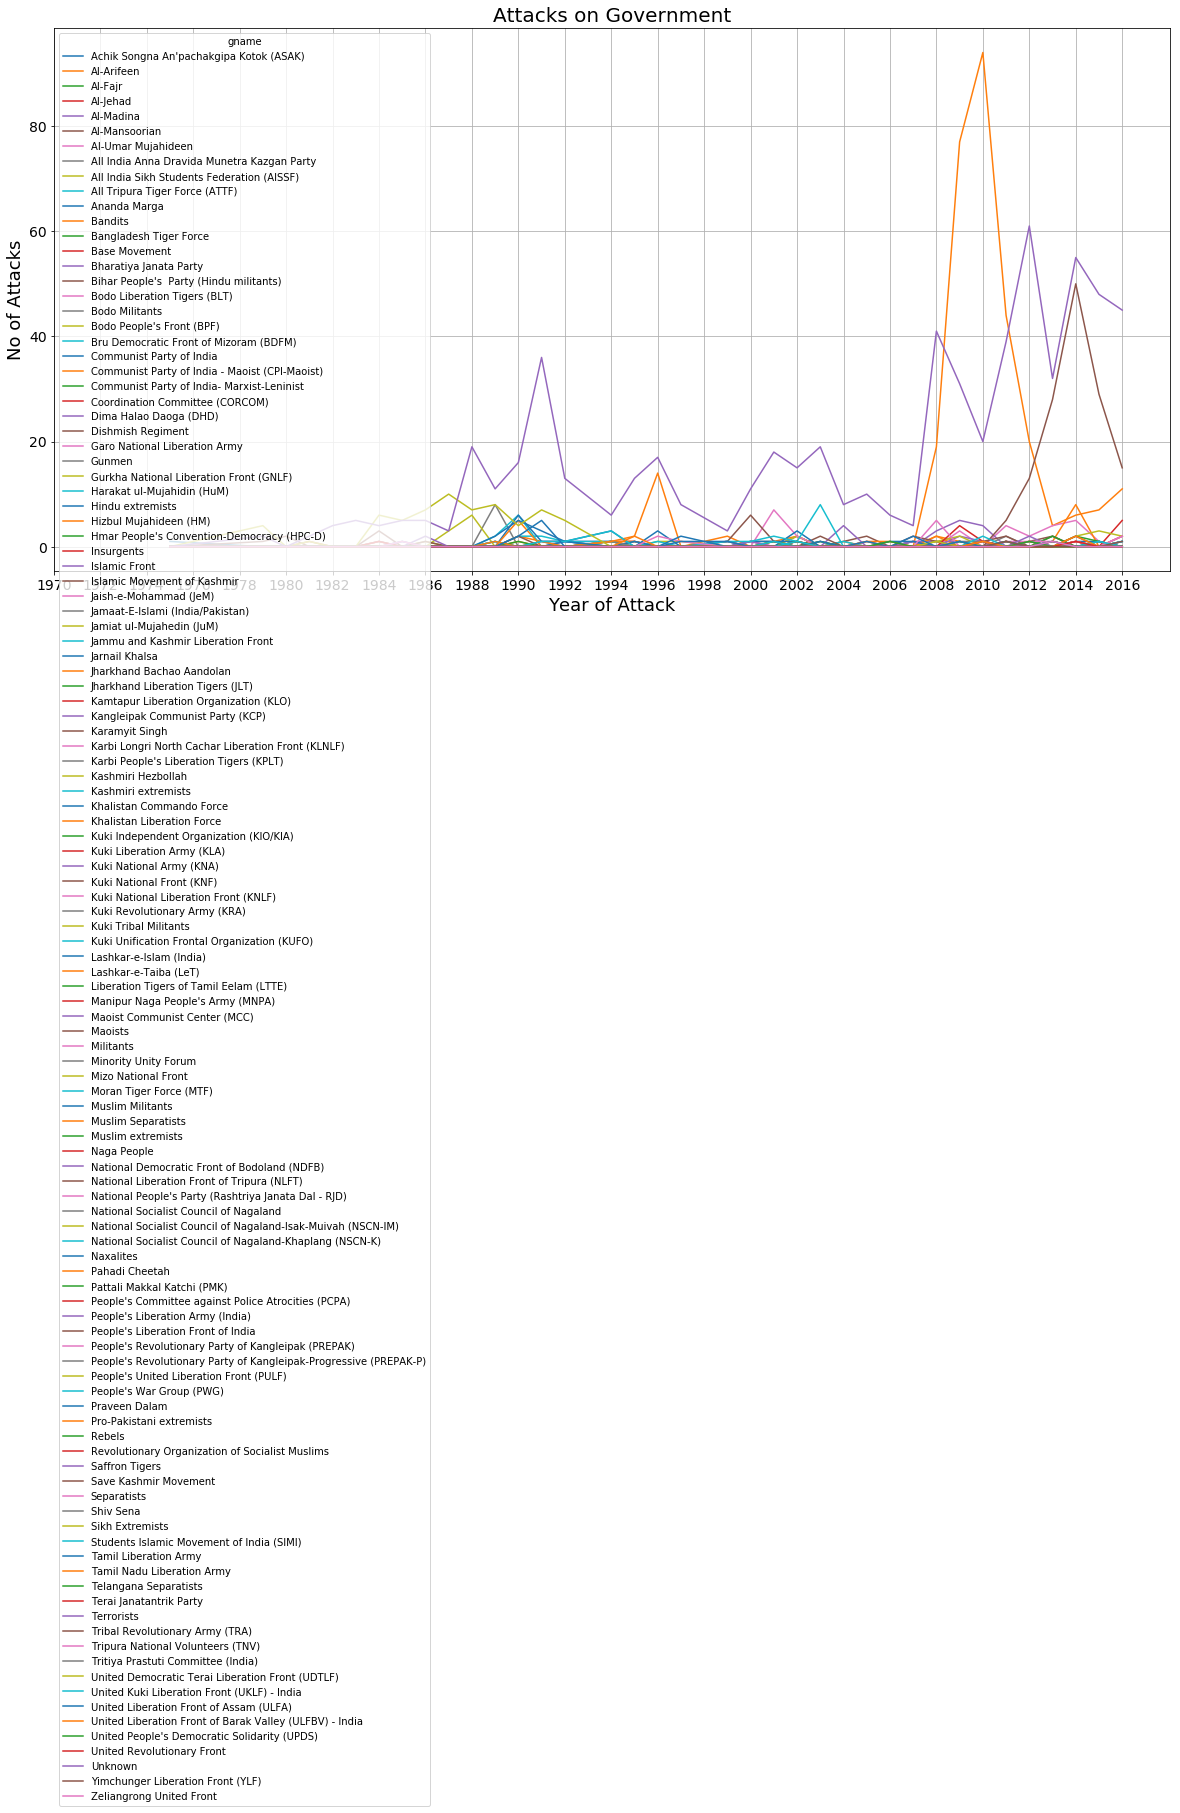

In [50]:
gov = df[(df['country_txt'] == 'India') & ((df['targtype1_txt'] == 'Government (General)') | (df['targtype1_txt'] == 'Government (Diplomatic)'))]
gov_attack = pd.crosstab(gov.iyear, gov.gname)
gov_attack.plot(figsize = (20, 10), grid = True)
plt.title("Attacks on Government", fontsize = 20)
plt.xlabel("Year of Attack", fontsize = 18)
plt.ylabel("No of Attacks", fontsize = 18)
plt.xticks(np.arange(1970, 2018, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Outcome of Hostage Events
We have performed an analysis of the hostage events based on the nummber of people killed and wounded. We have also performed an year-wise analysis of hostage (or kidnapping) events.

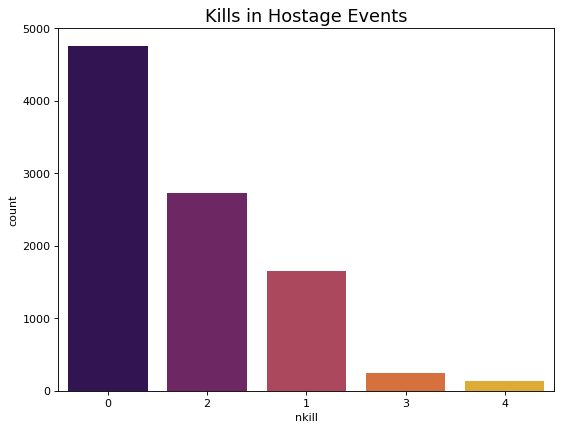

In [51]:
host = df[df['attacktype1_txt'] == 'Hostage Taking (Kidnapping)']
plt.subplots(figsize=(8,6), dpi=80)
sns.countplot('nkill',data=host, palette='inferno',order=host['nkill'].value_counts().index)
plt.title('Kills in Hostage Events', fontsize=16)
plt.show()

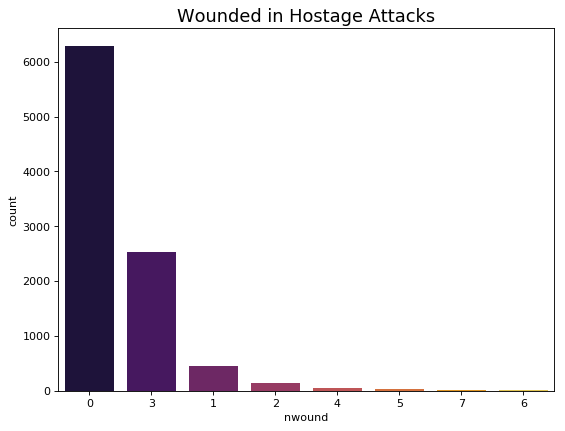

In [52]:
plt.subplots(figsize=(8,6), dpi=80)
sns.countplot('nwound',data=host, palette='inferno',order=host['nwound'].value_counts().index)
plt.title('Wounded in Hostage Attacks', fontsize=16)
plt.show()

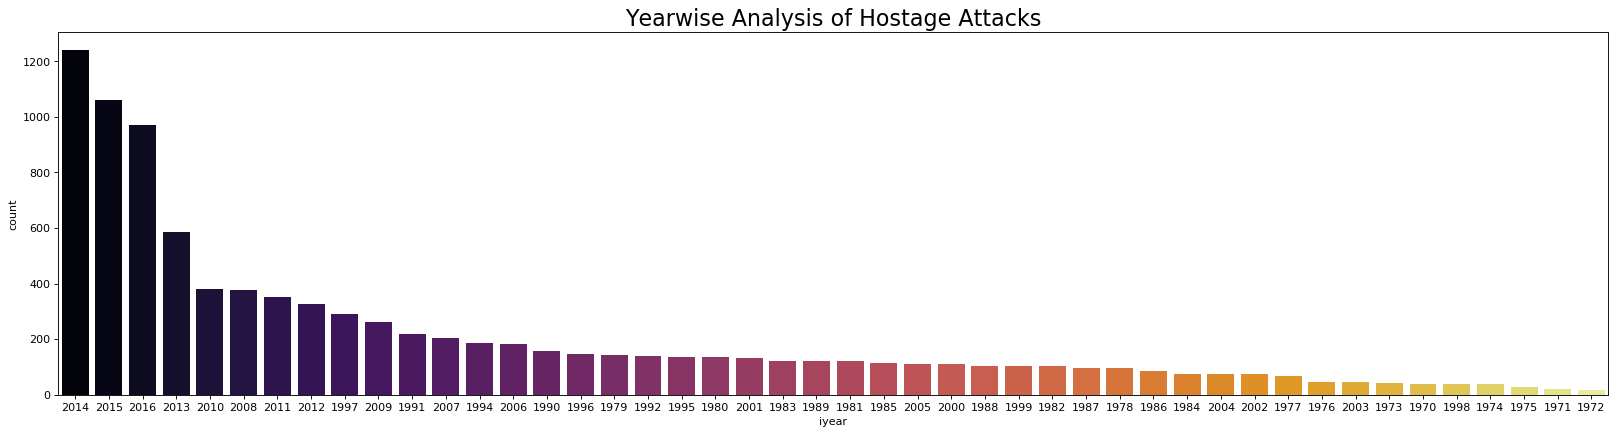

In [53]:
plt.subplots(figsize=(25,6),dpi=80)
sns.countplot('iyear',data=host, palette='inferno',order=host['iyear'].value_counts().index)
plt.title('Yearwise Analysis of Hostage Attacks', fontsize = 20)
plt.show()

## Analysis of Suicide Attacks (1970-2017)
In the past few decades there have been steep reise in the number of suicide attacks. Terrorist Organizations are recruiting people that are faithful to their cause. Many of them are fanatics and are so motivated towards their cause that they employ suicide tactics as a part of their attacks. We have performed a year-wise analysis on the number of suicide attacks.

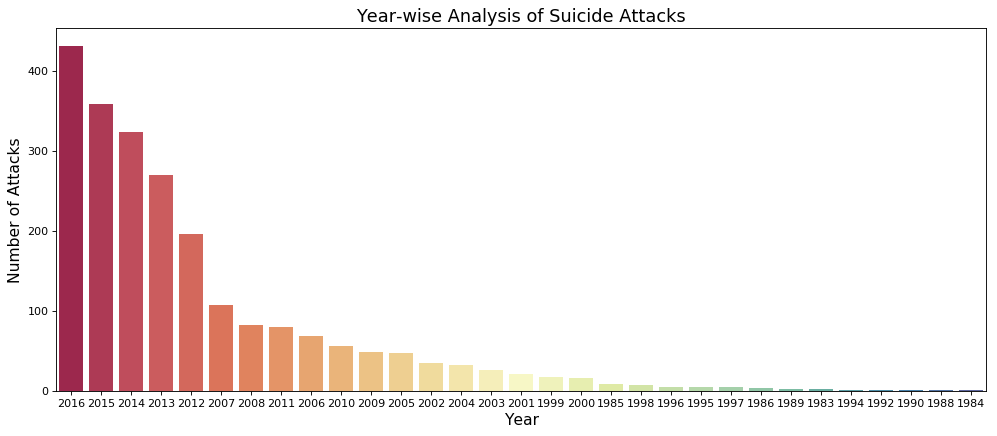

In [54]:
suicide_attack = df[df['suicide'] >= 1]
plt.subplots(figsize=(15,6),dpi=80)
sns.countplot('iyear',data=suicide_attack, palette='Spectral',order=suicide_attack['iyear'].value_counts().index)#, hue='nkill')
plt.title('Year-wise Analysis of Suicide Attacks', fontsize = 16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.show()

## Analysis of Suicide Attacks (based on region)
Here, we have analysed that in which region most number of suicide attacks occured and how many persons were killed.

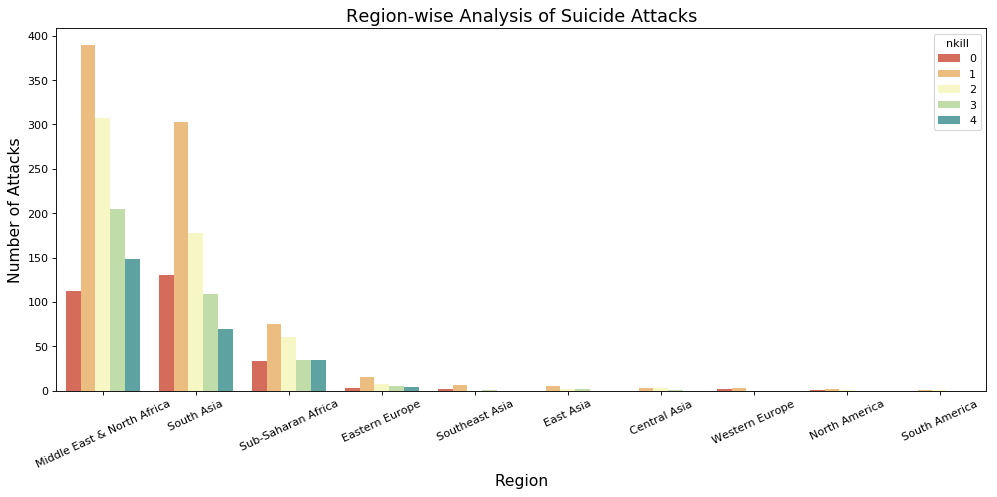

In [55]:
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('region_txt',data=suicide_attack, palette='Spectral',order=suicide_attack['region_txt'].value_counts().index, hue='nkill')
plt.title('Region-wise Analysis of Suicide Attacks', fontsize = 16)
plt.xticks(rotation=25)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.show()

## Most Fatal attack year-wise analysis (based on number of kills and wounded)
We are doing the analysis of the most fatal attack of a particular year- based on the number of people killed and wounded. We find the attack of a particular year with most casualties and compare the data with that of other years. The analysis haas been made for years 1970-2016.

In [56]:
df2 = df[(df['nkill'] > 0) & (df['nwound'] > 0)]
year_victims = df2.groupby(['iyear', 'nkill', 'nwound']).size().to_frame().reset_index()
year_victims['nkill'] = year_victims['nkill'] * year_victims[0]
year_victims['nwound'] = year_victims['nwound'] * year_victims[0]
year_victims['victims'] = (year_victims['nkill'] + year_victims['nwound']).round(0)
year_victims = year_victims.drop(columns=0)
year_victims = year_victims.sort_values(by='victims', ascending=False).reset_index()
year_victims = year_victims.drop(columns=['index','nkill','nwound']).sort_values(by='iyear').set_index('iyear')
year_victims = year_victims.max(level='iyear').reset_index()

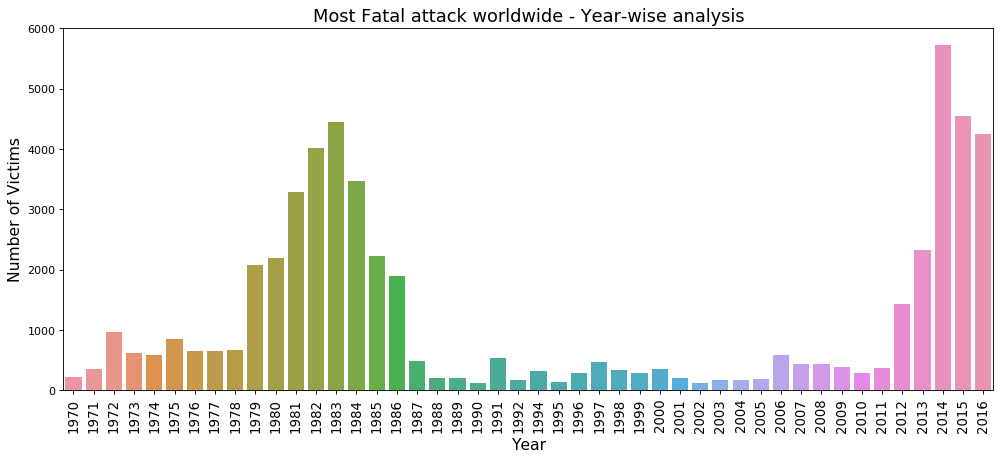

In [57]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="iyear",y='victims',data=year_victims)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of Victims",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most Fatal attack worldwide - Year-wise analysis", fontsize=16)
plt.show()

## Region-wise analysis of most fatal attack (based on number of kills and wounded)
We are performing the region-wise analysis of the most fatal attack- based on the number of people killed and wounded. We find the attack of a particular region with most casualties and compare the data with that of other region. The analysis haas been made for years 1970-2016 for all the regions.

In [58]:
df2 = df[(df['nkill'] > 0) & (df['nwound'] > 0)]
region_victims = df2.groupby(['region_txt', 'nkill', 'nwound']).size().to_frame().reset_index()
region_victims['nkill'] = region_victims['nkill'] * region_victims[0]
region_victims['nwound'] = region_victims['nwound'] * region_victims[0]
region_victims['victims'] = (region_victims['nkill'] + region_victims['nwound']).round(0)
region_victims = region_victims.drop(columns=0)
region_victims = region_victims.sort_values(by='victims', ascending=False).reset_index()
region_victims = region_victims.drop(columns=['index','nkill','nwound']).set_index('region_txt')
region_victims = region_victims.max(level='region_txt').reset_index()

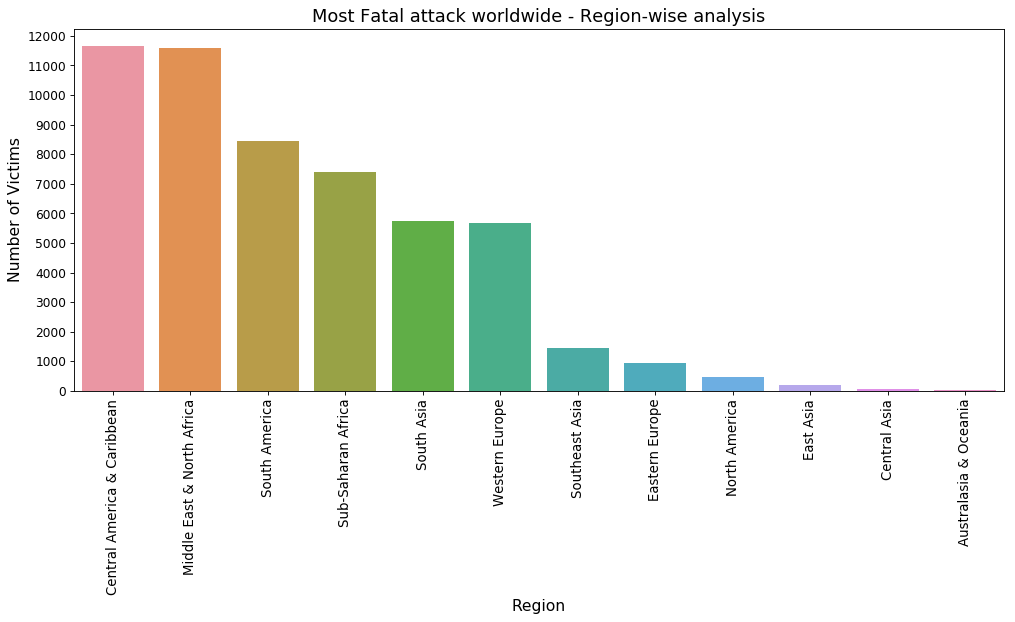

In [59]:
plt.subplots(figsize=(15,6),dpi=80)
sns.barplot(x="region_txt",y='victims',data=region_victims)
plt.xlabel("Region",fontsize=14)
plt.ylabel("Number of Victims",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(np.arange(0,13000,1000), fontsize=11)
plt.title("Most Fatal attack worldwide - Region-wise analysis", fontsize=16)
plt.show()

## Most attacked cities in the world
Cities being a the most populus region in a particular State of a Country provide themselves as a big target for terrorist groups. We analyse the top 20 most attacked cities in the world

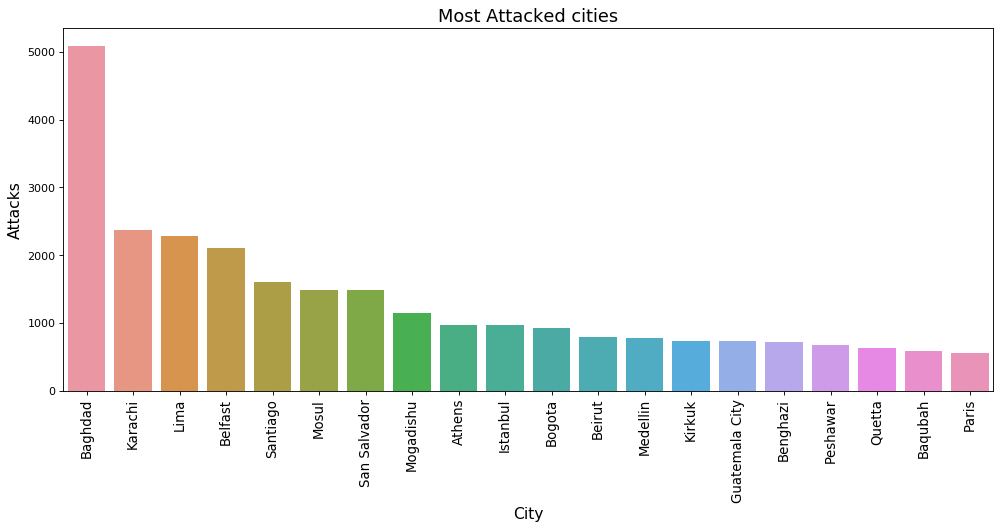

In [60]:
#To find which city that has most number of attacks
dfc=df.groupby("city").size().to_frame().reset_index()
dfc=dfc[~(dfc["city"]=="Unknown")]
dfc.sort_values(by=0,ascending=False,inplace=True)
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="city",y=0,data=dfc[:20])
plt.xlabel("City",fontsize=14)
plt.ylabel("Attacks",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most Attacked cities", fontsize=16)
plt.show()

From the above plot, we draw an inference that Baghdad is the most attacked city in the world since 1970s. From 1970 onwards Baghdad has been attacked more thaan 5000 times with Karachi coming second with nearly 2500 attacks. Now, we look a little more closely into the type of attacks in the city of Baghdad since 1970s and their success rate.

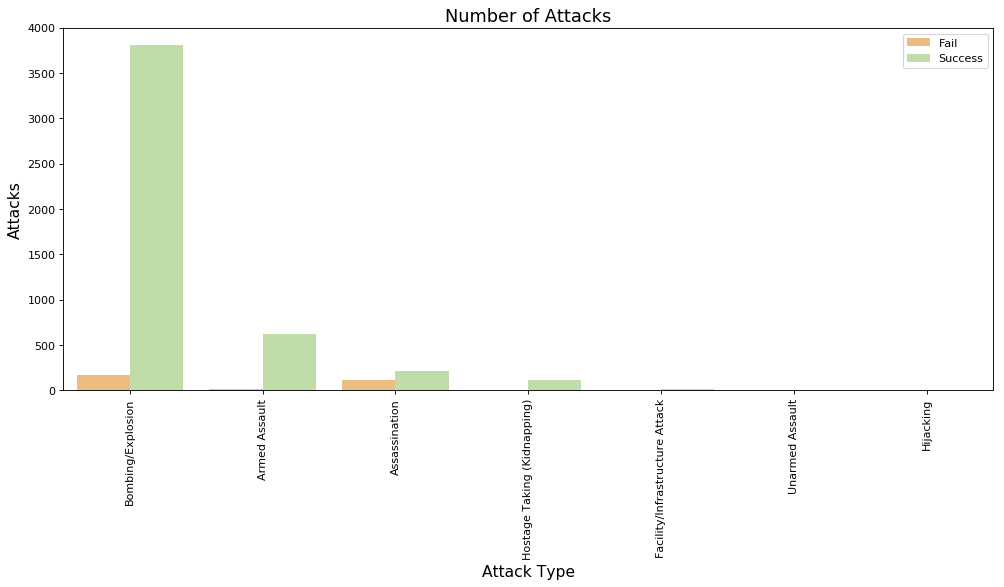

In [61]:
#Most utilised methid in Baghdad(Most attacked city).
dfci=df[(df["city"]=="Baghdad") & (df["attacktype1_txt"] != "Unknown")]
plt.subplots(figsize=(15,6), dpi=80)
sns.countplot('attacktype1_txt',data=dfci,palette='Spectral',order=dfci['attacktype1_txt'].value_counts().index, hue='success')
plt.xticks(rotation=90)
plt.title('Number of Attacks',fontsize=16)
plt.xlabel("Attack Type", fontsize=14)
plt.ylabel("Attacks", fontsize=14)
plt.legend(labels=['Fail', 'Success'], loc='upper right')
plt.show()

## Most attacked cities of India
India, the second most populus country of the world, comes 4th in the list of most terrorized countries. Here we perform an analysis to see which cities of India have been attacked most.

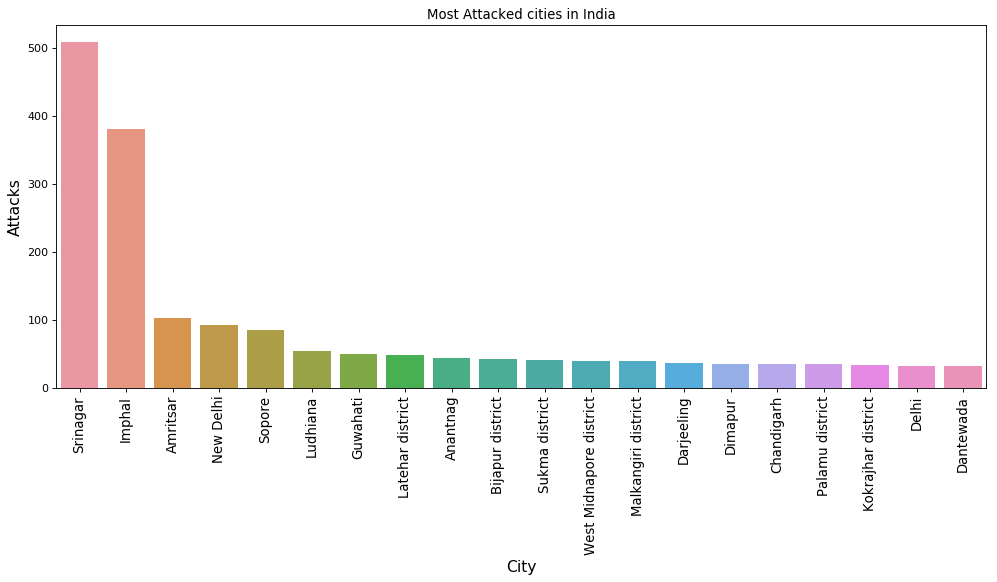

In [62]:
#Most Attacked City in INDIA:
dfind=df[df["country_txt"]=="India"]
dfin=dfind.groupby("city").size().to_frame().reset_index()
dfin=dfin[~(dfin["city"]=="Unknown")]
dfin.sort_values(by=0,ascending=False,inplace=True)
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="city",y=0,data=dfin[:20])
plt.xlabel("City",fontsize=14)
plt.ylabel("Attacks",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most Attacked cities in India")
plt.show()

From the above plot we can clearly see that Srinagar is the most attacked city in India. Being the capital of Jammu & Kashmir, a region of constant strife and terrorist activities, made Srinagar more terror prone. We perform a more deeper aanalysis on the types of terrorist attacks in Srinagar.

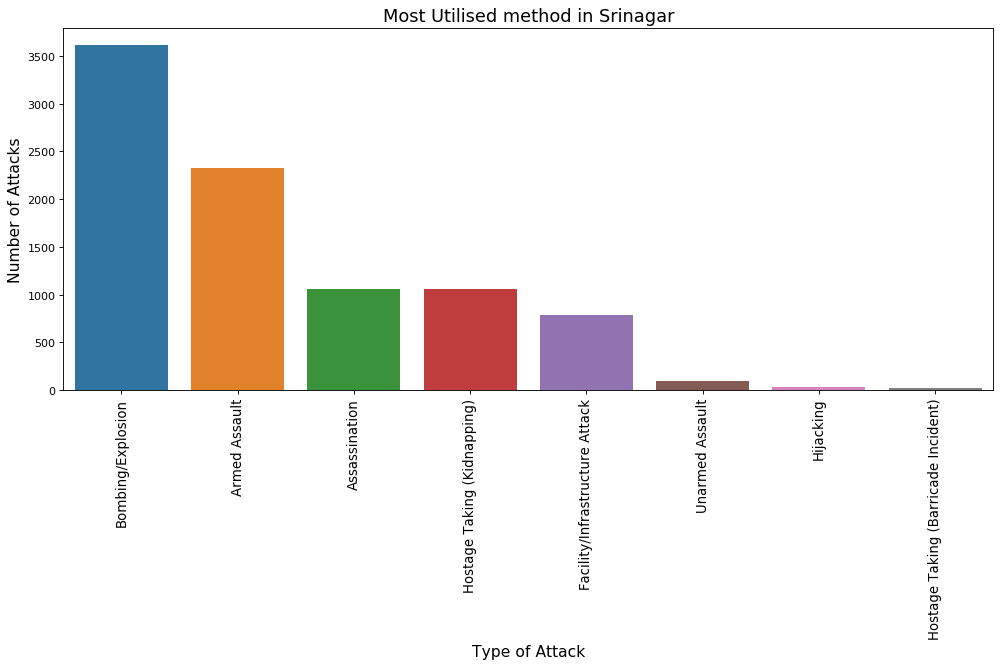

In [63]:
dfct=dfind.groupby("attacktype1_txt").size().to_frame().reset_index()
dfct=dfct[~(dfct["attacktype1_txt"]=="Unknown")]
dfct.sort_values(by=0,ascending=False,inplace=True)
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="attacktype1_txt",y=0,data=dfct[:20])
plt.xlabel("Type of Attack",fontsize=14)
plt.ylabel("Number of Attacks",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most Utilised method in Srinagar", fontsize=16)
plt.show()

## Analysis of Nationality of terror groups (based on number of attacks)
There have been more the 3500 terrorist groups active sinnce 1970s. But the terrorists do belong to some country.
Here we perform an analysis on the nationality of the terror groups - most number of attacks by terrorists belonging to a particular country. We again take the help of the seaborn module to plot and show the top 20 countries to which the the terror groups belong to, on the basis of the number of attacks.

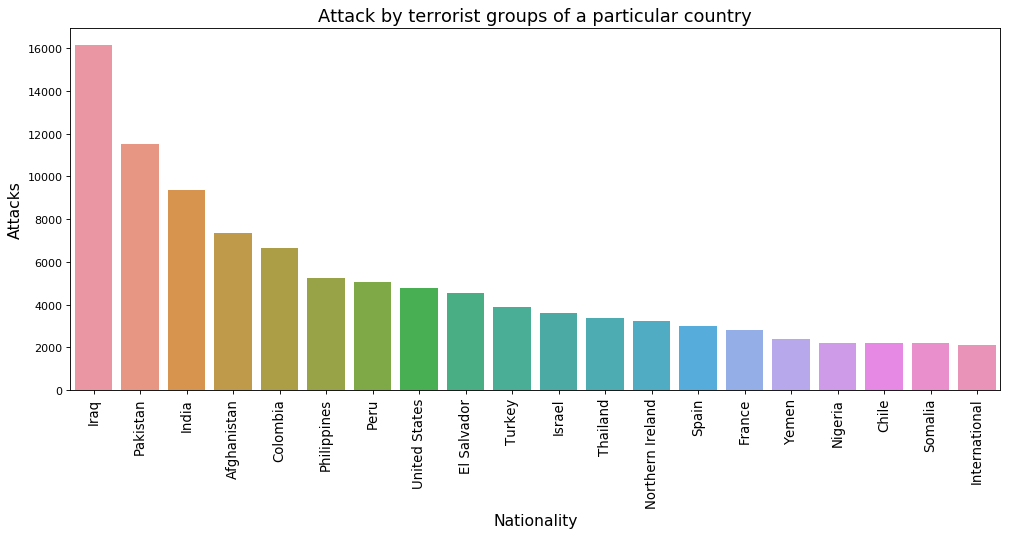

In [64]:
dfn=df.groupby("natlty1_txt").size().to_frame().reset_index()
dfn.sort_values(by=0,ascending=False,inplace=True)
plt.subplots(figsize=(15,6),dpi=80)
sns.barplot(x="natlty1_txt",y=0,data=dfn[:20])
plt.xlabel("Nationality",fontsize=14)
plt.ylabel("Attacks",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Attack by terrorist groups of a particular country", fontsize=16)
plt.show()

## Analysis of Casualties (1970-2017)
We are performing the analysis of casualties of the terror attacks per year worldwide. The total casualties are found on the basis of the number of kills and wounded. We plot the data on two seperate plots showing the number of people killed and wounded in a particular year considering all terrorist attacks.

In [65]:
#Number of kills per year

df3=df[~(df["nkill"]<0)]
year_kills=df3.groupby(["iyear","nkill"]).size().to_frame().reset_index()
year_kills["nkill"]=year_kills["nkill"]*year_kills[0]
year_kills=year_kills[~(year_kills["nkill"]==0)]
year_kills.drop(columns=0,inplace=True)
year_kills=year_kills.set_index("iyear").sum(level="iyear").sort_values(by="nkill",ascending=False).reset_index()
#year_kills_2000=year_kills[year_kills["nkill"]>100]

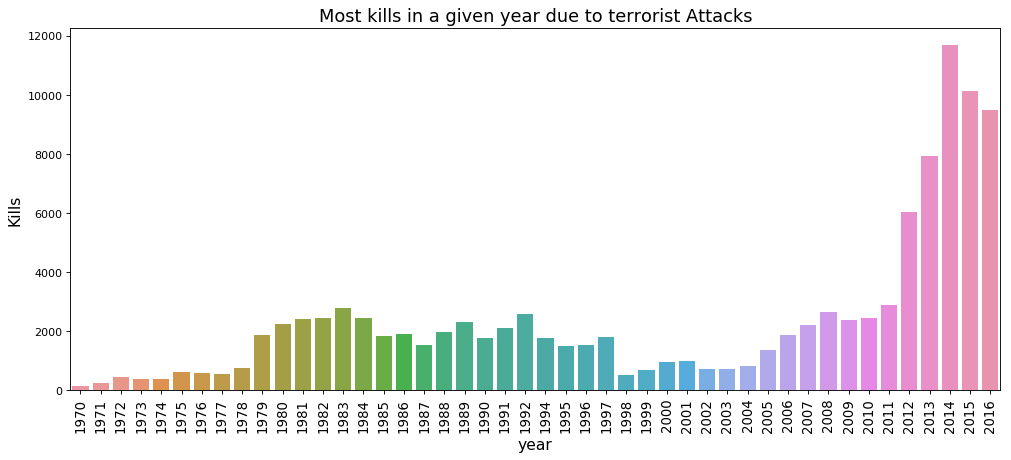

In [66]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="iyear",y="nkill",data=year_kills)
plt.xlabel("year",fontsize=14)
plt.ylabel("Kills",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most kills in a given year due to terrorist Attacks",fontsize=16)
plt.show()

In [67]:
df4=df[~(df["nwound"]<0)]
year_kills=df4.groupby(["iyear","nwound"]).size().to_frame().reset_index()
year_kills["nwound"]=year_kills["nwound"]*year_kills[0]
year_kills=year_kills[~(year_kills["nwound"]==0)]
year_kills.drop(columns=0,inplace=True)
year_kills=year_kills.set_index("iyear").sum(level="iyear").sort_values(by="nwound",ascending=False).reset_index()
#year_kills_2000=year_kills[year_kills["nwound"]>100]

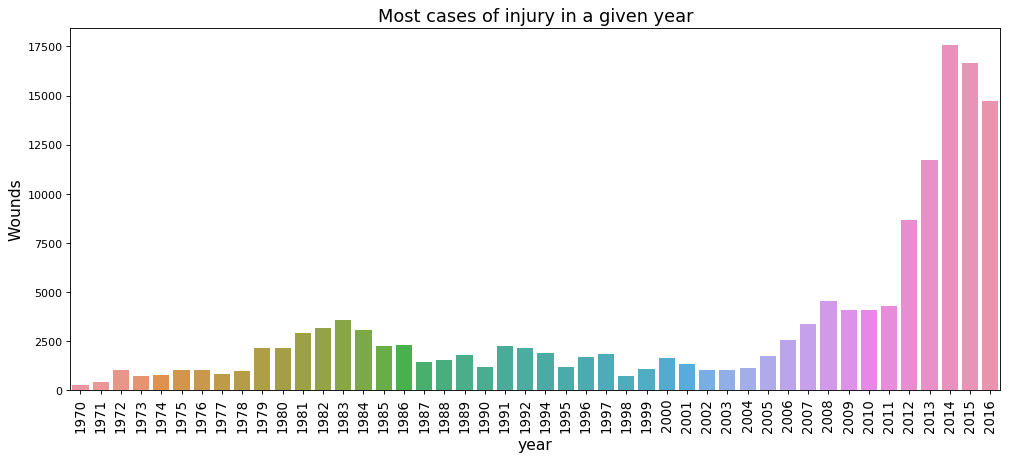

In [68]:
plt.subplots(figsize=(15,6), dpi=80)
sns.barplot(x="iyear",y="nwound", data=year_kills)
plt.xlabel("year",fontsize=14)
plt.ylabel("Wounds",fontsize=14)
plt.xticks(rotation=90,fontsize=12)
plt.title("Most cases of injury in a given year", fontsize=16)
plt.show()